#Initialization

In [ ]:
pip install scikit-XCS

     |████████████████████████████████| 316 kB 4.3 MB/s 
  Created wheel for scikit-XCS: filename=scikit_XCS-1.0.7-py3-none-any.whl size=35944 sha256=27232a6895ac775dfbb4075a4ce5978dd33ae1fbc3a9db40304e04d549ced49c
  Stored in directory: /root/.cache/pip/wheels/10/5e/44/b99e55f3c73e70da959ec35518bd4209acd37be839d55815e8
Successfully built scikit-XCS


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from google.colab import files

# Training Data

In [ ]:
data = pd.read_csv ('/content/leaf_train.csv')

data

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,Class
0,0.98361,5.8719,0.82847,0.95488,0.98421,0.32134,0.040164,0.293590,0.039243,0.116220,0.013327,0.004387,0.000195,1.00060,8
1,0.75285,1.5603,0.38474,0.98701,0.99649,0.78037,0.004611,0.003870,0.046705,0.117230,0.013556,0.003816,0.000284,1.35390,13
2,0.47565,1.0656,0.69172,0.52330,0.49649,0.14133,0.129870,3.069700,0.023977,0.084200,0.007040,0.002084,0.000113,0.77399,11
3,0.98600,6.1763,0.83942,0.97837,0.99298,0.31607,0.011769,0.025208,0.051048,0.135240,0.017961,0.006018,0.000313,1.16600,8
4,0.73429,1.5069,0.40827,0.94518,1.00000,0.62558,0.014987,0.040879,0.038113,0.092188,0.008427,0.001777,0.000474,1.33500,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.71763,1.5041,0.33723,0.98803,1.00000,0.82342,0.004042,0.002974,0.050064,0.125420,0.015486,0.004663,0.000271,1.35980,13
200,0.91708,2.6498,0.62919,0.98493,1.00000,0.57926,0.006805,0.008429,0.082187,0.168770,0.027693,0.008503,0.000640,1.71570,35
201,0.86587,1.9999,0.52725,0.97215,0.99474,0.67283,0.009296,0.015726,0.021192,0.073946,0.005438,0.001467,0.000155,0.78201,7
202,0.87402,2.0754,0.55373,0.96281,0.98421,0.56448,0.019656,0.070316,0.037553,0.109460,0.011839,0.003850,0.000214,1.06930,26


In [ ]:
ClassLabel="Class"
dataFeatures = data.drop(ClassLabel,axis = 1).values

r=len(dataFeatures)
dataFeatures=dataFeatures[:r]

In [ ]:
Features = data.drop(ClassLabel,axis = 1).columns.values
#features=list(Features.columns.values)
print(Features)

['Eccentricity' 'Aspect Ratio' 'Elongation' 'Solidity'
 'Stochastic Convexity' 'Isoperimetric Factor' 'Maximal Indentation Depth'
 'Lobedness' 'Average Intensity' 'Average Contrast' 'Smoothness'
 'Third moment' 'Uniformity' 'Entropy']


In [ ]:
dataActions = data[ClassLabel].values
dataActions= dataActions[:r]

In [ ]:
dataActions

array([ 8, 13, 11,  8,  4, 27, 35, 10,  6,  7, 13, 30,  3,  3, 28, 30, 33,
       10, 11,  9, 34, 24,  1, 22, 14, 13, 36,  6, 13, 24, 34,  9, 11, 22,
        8, 13,  4, 14, 26, 36, 27,  4, 30, 15, 32, 10, 33, 32, 23, 27, 27,
        7,  1,  9, 25, 24, 35, 29, 22,  1,  5, 33,  4, 28, 11, 14, 36, 25,
        2, 31,  1, 30, 26, 14, 11,  3, 24, 32, 13, 28, 12, 27, 24, 12,  3,
       13, 22, 28, 11,  7, 29, 29, 12, 36, 25, 15, 31,  6,  6, 26,  1, 15,
        8, 30,  7, 11, 36,  1,  5, 12, 12,  5, 27, 28, 32, 24, 32, 25, 29,
       24,  2, 35, 31,  3, 13,  4, 22, 27, 36, 10,  7, 27, 11,  9,  9,  9,
       12, 24, 11, 34, 15, 29,  2, 35, 14, 30, 22, 25, 24, 24, 31, 32,  5,
        6,  1, 11, 12, 25, 10, 15, 36, 13, 28,  2, 30, 12, 26,  5, 30, 10,
       28, 15, 32,  9, 29, 27, 34, 29,  8, 24,  6,  2, 23, 22, 32, 22, 24,
       36, 26, 35, 26, 35,  8, 11, 28, 14, 28, 33,  7, 13, 35,  7, 26, 14])

In [ ]:
DataActions=LabelBinarizer().fit_transform(dataActions)

# False Test Data

In [ ]:
test = pd.read_csv ('/content/leaf_test.csv')

test

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,Class
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,1
1,0.46348,1.0544,0.72231,0.63754,0.47544,0.20039,0.148640,4.021200,0.010917,0.053494,0.002853,0.000875,0.000030,0.53199,6
2,0.55362,1.2438,0.39517,0.91092,0.97193,0.51113,0.046323,0.390550,0.083154,0.174650,0.029600,0.009457,0.000746,1.58070,10
3,0.99799,15.0680,0.93667,0.88070,0.95789,0.12132,0.032164,0.188280,0.011686,0.054827,0.002997,0.000864,0.000044,0.50576,34
4,0.84563,1.7418,0.49818,0.92748,1.00000,0.62301,0.014708,0.039374,0.025028,0.077667,0.005996,0.002105,0.000296,1.18990,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.50114,1.2499,0.30101,0.94477,0.98070,0.67430,0.049400,0.444150,0.096252,0.230340,0.050382,0.025877,0.000269,1.44630,10
132,0.60319,1.0880,0.51739,0.76380,0.90175,0.23802,0.077022,1.079700,0.109940,0.179760,0.031303,0.008885,0.000879,2.66130,15
133,0.48967,1.1232,0.46175,0.80214,0.90000,0.31034,0.073462,0.982200,0.101250,0.179260,0.031133,0.010102,0.000681,2.48080,15
134,0.82775,1.8420,0.48769,0.97383,0.99825,0.68405,0.016190,0.047706,0.022041,0.087963,0.007678,0.002965,0.000069,0.68174,26


In [ ]:
ClassLabel="Class"
dataFeatures_test = test.drop(ClassLabel,axis = 1).values

r=len(dataFeatures_test)
dataFeatures_test=dataFeatures_test[:r]

In [ ]:
dataActions_test = test[ClassLabel].values
dataActions_test= dataActions_test[:r]

In [ ]:
DataActions_test=LabelBinarizer().fit_transform(dataActions_test) 

# Real Test Data

In [2]:
true = pd.read_csv ('/content/leaf_real.csv')

true

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,Class
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,1
1,0.46348,1.0544,0.72231,0.63754,0.47544,0.20039,0.148640,4.021200,0.010917,0.053494,0.002853,0.000875,0.000030,0.53199,6
2,0.55362,1.2438,0.39517,0.91092,0.97193,0.51113,0.046323,0.390550,0.083154,0.174650,0.029600,0.009457,0.000746,1.58070,10
3,0.99799,15.0680,0.93667,0.88070,0.95789,0.12132,0.032164,0.188280,0.011686,0.054827,0.002997,0.000864,0.000044,0.50576,34
4,0.84563,1.7418,0.49818,0.92748,1.00000,0.62301,0.014708,0.039374,0.025028,0.077667,0.005996,0.002105,0.000296,1.18990,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.50114,1.2499,0.30101,0.94477,0.98070,0.67430,0.049400,0.444150,0.096252,0.230340,0.050382,0.025877,0.000269,1.44630,10
132,0.60319,1.0880,0.51739,0.76380,0.90175,0.23802,0.077022,1.079700,0.109940,0.179760,0.031303,0.008885,0.000879,2.66130,15
133,0.48967,1.1232,0.46175,0.80214,0.90000,0.31034,0.073462,0.982200,0.101250,0.179260,0.031133,0.010102,0.000681,2.48080,15
134,0.82775,1.8420,0.48769,0.97383,0.99825,0.68405,0.016190,0.047706,0.022041,0.087963,0.007678,0.002965,0.000069,0.68174,26


In [3]:
ClassLabel="Class"
dataFeatures_true = true.drop(ClassLabel,axis = 1).values

r=len(dataFeatures_true)
dataFeatures_true=dataFeatures_true[:r]

In [23]:
iteration=len(dataFeatures_true[0])

In [4]:
dataActions_true = true[ClassLabel].values
dataActions_true= dataActions_true[:r]

In [ ]:
DataActions_true=LabelBinarizer().fit_transform(dataActions_true)

# Index log

In [ ]:
index=[]
index

[]

In [ ]:
for x in range(0,136):
  if dataFeatures_true[x][4]!=dataFeatures_test[x][4]:
    index.append(x+1)

index

[11,
 17,
 19,
 21,
 27,
 33,
 39,
 40,
 44,
 50,
 54,
 59,
 61,
 62,
 64,
 70,
 78,
 79,
 81,
 84,
 86,
 92,
 98,
 101,
 104,
 108,
 117,
 122,
 129,
 131]

#Classifier

In [ ]:
from skXCS import XCS
model = XCS(N=10000, learning_iterations = 10000,nu = 10,alpha=0.4)
trainedModel = model.fit(dataFeatures,dataActions)

# Rule Data

In [ ]:
trainedModel.export_iteration_tracking_data("iterationData_leaf_XCS_verification.csv")

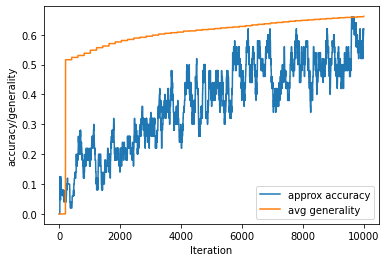

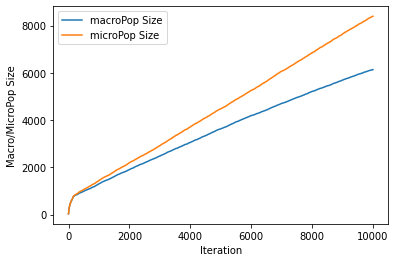

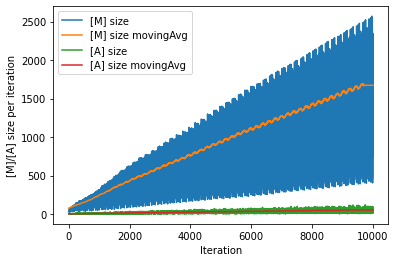

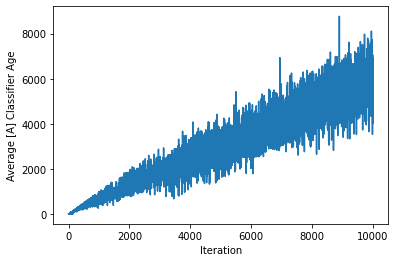

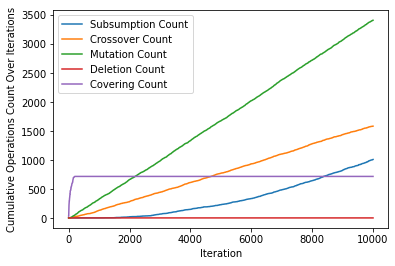

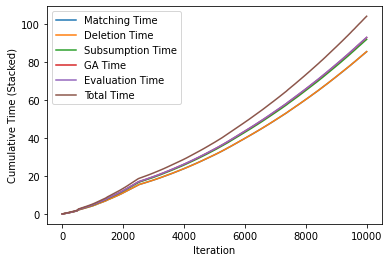

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_leaf_XCS_verification.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
aSize = dataTracking["Action Set Size"].values
experience = dataTracking["Average Iteration Age of Action Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total GA Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,aSize,label="[A] size")
plt.plot(iterations,movingAvg(aSize),label="[A] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[A] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [A] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="GA Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [ ]:
trainedModel.export_final_rule_population("RulePopulationLeafXCS_verification.csv",Features,ClassLabel)

populationData2 = pd.read_csv("RulePopulationLeafXCS_verification.csv")
display(populationData2)

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,...,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"0.4105084,0.8152716000000001","-0.805231,3.003431",#,"0.7817153,1.0663847","0.863508,1.1049120000000001",#,"-0.017134536000000002,0.068224536",#,#,"0.11000927999999999,0.21119072",...,0.000000,1.000000e+00,2,102.159628,9545,0,0.642857,NaN,14,688
1,#,#,#,#,#,"0.42946184,0.80375816","-0.03754648800000002,0.08863648800000001",#,#,#,...,442.013591,1.405089e-17,1,65.997880,9846,0,0.214286,NaN,495,4461
2,#,#,#,#,#,#,#,#,"-0.009361594500000014,0.11873559450000001","0.07175775999999999,0.24944223999999998",...,367.570770,8.884854e-17,2,82.499360,9950,0,0.357143,NaN,94,2942
3,#,#,#,#,"0.8182447500000001,1.15017525",#,"-0.04218556800000001,0.093275568","-2.144784335,2.3823243350000003","-0.012146316000000004,0.121520316","0.08409696,0.23710304",...,295.413527,7.902349e-16,8,103.319532,9790,0,0.571429,NaN,157,5001
4,#,"-2.3056129999999997,4.503812999999999",#,"0.7567443,1.0913557",#,"0.4996424,0.7335776","-0.03754648800000002,0.08863648800000001",#,"0.0314809875,0.0778930125",#,...,419.335717,2.379257e-17,1,96.299389,9850,0,0.500000,NaN,94,1325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6128,#,"-2.223699,4.3548990000000005","0.45184024999999994,1.15592085",#,#,#,"0.095601728,0.173538272",#,#,#,...,0.000000,1.000000e+00,1,16.150400,9993,9993,0.357143,NaN,0,0
6129,#,#,#,"0.7617385000000001,1.0863615","0.7877866,0.99621485",#,#,#,#,#,...,0.000000,1.000000e+00,1,105.225600,9996,9996,0.214286,NaN,0,0
6130,#,#,#,#,"0.71256515,1.1981734",#,#,#,"-7.918950000000008e-05,0.10945318949999999",#,...,0.000000,1.000000e+00,1,84.500000,9996,9996,0.142857,NaN,0,3
6131,#,"-1.8594570000000001,4.345457",#,#,#,"0.35660668000000006,1.0331484400000002","-0.019108448000000007,0.09346248800000001",#,#,#,...,0.000000,1.000000e+00,1,106.724649,9997,9997,0.285714,NaN,0,2


In [ ]:
trainedModel.export_final_rule_population_DCAL("RulePopulationLeafXCS2_verification.csv",Features,ClassLabel)

populationData3 = pd.read_csv("RulePopulationLeafXCS2_verification.csv")
display(populationData3)

,Specified Values,Specified Attribute Names,Class,Fitness,Prediction,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"[0.4105084,0.8152716000000001], [-0.805231,3.0...","Eccentricity, Aspect Ratio, Solidity, Stochast...",33,6.696959e-02,0.000000,0.000000,1.000000e+00,2,102.159628,9545,0,0.642857,NaN,14,688
1,"[0.42946184,0.80375816], [-0.03754648800000002...","Isoperimetric Factor, Maximal Indentation Dept...",24,2.083214e-03,460.739599,442.013591,1.405089e-17,1,65.997880,9846,0,0.214286,NaN,495,4461
2,"[-0.009361594500000014,0.11873559450000001], [...","Average Intensity, Average Contrast, Smoothnes...",11,8.607361e-07,298.991608,367.570770,8.884854e-17,2,82.499360,9950,0,0.357143,NaN,94,2942
3,"[0.8182447500000001,1.15017525], [-0.042185568...","Stochastic Convexity, Maximal Indentation Dept...",27,2.301602e-03,188.137592,295.413527,7.902349e-16,8,103.319532,9790,0,0.571429,NaN,157,5001
4,"[-2.3056129999999997,4.503812999999999], [0.75...","Aspect Ratio, Solidity, Isoperimetric Factor, ...",14,2.287968e-04,379.704006,419.335717,2.379257e-17,1,96.299389,9850,0,0.500000,NaN,94,1325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6128,"[-2.223699,4.3548990000000005], [0.45184024999...","Aspect Ratio, Elongation, Maximal Indentation ...",32,8.340355e-03,0.000000,0.000000,1.000000e+00,1,16.150400,9993,9993,0.357143,NaN,0,0
6129,"[0.7617385000000001,1.0863615], [0.7877866,0.9...","Solidity, Stochastic Convexity, Uniformity",28,1.879510e-03,0.000000,0.000000,1.000000e+00,1,105.225600,9996,9996,0.214286,NaN,0,0
6130,"[0.71256515,1.1981734], [-7.918950000000008e-0...","Stochastic Convexity, Average Intensity",28,1.669577e-02,0.000000,0.000000,1.000000e+00,1,84.500000,9996,9996,0.142857,NaN,0,3
6131,"[-1.8594570000000001,4.345457], [0.35660668000...","Aspect Ratio, Isoperimetric Factor, Maximal In...",34,9.804785e-04,0.000000,0.000000,1.000000e+00,1,106.724649,9997,9997,0.285714,NaN,0,2


# Ruleset Dataframe

In [12]:
ruleset = pd.read_csv ('/content/RulePopulationLeafXCS_check.csv')

ruleset

,Eccentricity_low,Eccentricity_high,Aspect_Ratio_Low,Aspect_Ratio_High,Elongation_Low,Elongation_High,Solidity_Low,Solidity_High,Stochastic Convexity_Low,Stochastic Convexity_High,...,Prediction,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Experience,Match Count
0,0.4105084,0.815272,-0.805231,3.003431,#,NaN,0.7817153,1.066385,0.863508,1.104912,...,0.000000,0.000000,1.000000e+00,2,102.159628,9545,0,0.642857,14,688
1,#,NaN,#,NaN,#,NaN,#,NaN,#,NaN,...,460.739599,442.013592,1.410000e-17,1,65.997880,9846,0,0.214286,495,4461
2,#,NaN,#,NaN,#,NaN,#,NaN,#,NaN,...,298.991608,367.570770,8.880000e-17,2,82.499360,9950,0,0.357143,94,2942
3,#,NaN,#,NaN,#,NaN,#,NaN,0.81824475,1.150175,...,188.137592,295.413527,7.900000e-16,8,103.319532,9790,0,0.571429,157,5001
4,#,NaN,-2.305613,4.503813,#,NaN,0.7567443,1.091356,#,NaN,...,379.704006,419.335717,2.380000e-17,1,96.299389,9850,0,0.500000,94,1325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6128,#,NaN,-2.223699,4.354899,0.45184025,1.155921,#,NaN,#,NaN,...,0.000000,0.000000,1.000000e+00,1,16.150400,9993,9993,0.357143,0,0
6129,#,NaN,#,NaN,#,NaN,0.7617385,1.086361,0.7877866,0.996215,...,0.000000,0.000000,1.000000e+00,1,105.225600,9996,9996,0.214286,0,0
6130,#,NaN,#,NaN,#,NaN,#,NaN,0.71256515,1.198173,...,0.000000,0.000000,1.000000e+00,1,84.500000,9996,9996,0.142857,0,3
6131,#,NaN,-1.859457,4.345457,#,NaN,#,NaN,#,NaN,...,0.000000,0.000000,1.000000e+00,1,106.724649,9997,9997,0.285714,0,2


In [13]:
ruleset2=ruleset.replace("#",np.nan)

In [14]:
ruleset3=ruleset2.replace(np.nan,0)

In [15]:
ruleset3

,Eccentricity_low,Eccentricity_high,Aspect_Ratio_Low,Aspect_Ratio_High,Elongation_Low,Elongation_High,Solidity_Low,Solidity_High,Stochastic Convexity_Low,Stochastic Convexity_High,...,Prediction,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Experience,Match Count
0,0.4105084,0.815272,-0.805231,3.003431,0,0.000000,0.7817153,1.066385,0.863508,1.104912,...,0.000000,0.000000,1.000000e+00,2,102.159628,9545,0,0.642857,14,688
1,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,...,460.739599,442.013592,1.410000e-17,1,65.997880,9846,0,0.214286,495,4461
2,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,...,298.991608,367.570770,8.880000e-17,2,82.499360,9950,0,0.357143,94,2942
3,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0.81824475,1.150175,...,188.137592,295.413527,7.900000e-16,8,103.319532,9790,0,0.571429,157,5001
4,0,0.000000,-2.305613,4.503813,0,0.000000,0.7567443,1.091356,0,0.000000,...,379.704006,419.335717,2.380000e-17,1,96.299389,9850,0,0.500000,94,1325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6128,0,0.000000,-2.223699,4.354899,0.45184025,1.155921,0,0.000000,0,0.000000,...,0.000000,0.000000,1.000000e+00,1,16.150400,9993,9993,0.357143,0,0
6129,0,0.000000,0,0.000000,0,0.000000,0.7617385,1.086361,0.7877866,0.996215,...,0.000000,0.000000,1.000000e+00,1,105.225600,9996,9996,0.214286,0,0
6130,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0.71256515,1.198173,...,0.000000,0.000000,1.000000e+00,1,84.500000,9996,9996,0.142857,0,3
6131,0,0.000000,-1.859457,4.345457,0,0.000000,0,0.000000,0,0.000000,...,0.000000,0.000000,1.000000e+00,1,106.724649,9997,9997,0.285714,0,2


In [19]:
Extra=['Class','Fitness','Prediction','Prediction Error','Accuracy','Numerosity','Avg Action Set Size','TimeStamp GA','Iteration Initialized','Specificity','Experience','Match Count']

In [21]:
correct=Extra[10]

In [22]:
#ruleset1
#Features = ruleset.drop(Extra,axis = 1).columns.values

#ruleset2
#Features = ruleset2.drop(Extra,axis = 1).columns.values

#ruleset3
Features = ruleset3.drop(Extra,axis = 1).columns.values

print(Features)

['Eccentricity_low' 'Eccentricity_high' 'Aspect_Ratio_Low'
 'Aspect_Ratio_High' 'Elongation_Low' 'Elongation_High' 'Solidity_Low'
 'Solidity_High' 'Stochastic Convexity_Low' 'Stochastic Convexity_High'
 'Isoperimetric Factor_Low' 'Isoperimetric Factor_High'
 'Maximal Indentation Depth_Low' 'Maximal Indentation Depth_High'
 'Lobedness_Low' 'Lobedness_High' 'Average Intensity_Low'
 'Average Intensity_High' 'Average Contrast_Low' 'Average Contrast_High'
 'Smoothness_Low' 'Smoothness_High' 'Third moment_Low' 'Third moment_High'
 'Uniformity_Low' 'Uniformity_High' 'Entropy_Low' 'Entropy_High']


# Real curve

## 1-15

### Class 1: Quercus suber

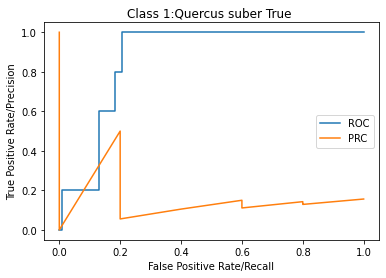

PRC AUC:0.14553323833777992
ROC AUC:0.8687022900763359


<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(dataFeatures_true)
fpr1, tpr1, thresholds1 = roc_curve(DataActions_true[:,0], probs[:,0])
prec1, recall1, thresholds1 = precision_recall_curve(DataActions_true[:,0], probs[:,0])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 1:Quercus suber True ')
plt.show()


print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))
plt.savefig("Class 1 Quercus suber LCS true.png")

In [ ]:
probs[0]

array([2.53707710e-04, 3.17107349e-02, 7.35724403e-05, 1.07249282e-03,
       6.98743615e-02, 1.53486911e-03, 4.67143595e-02, 8.64095533e-04,
       1.05869316e-04, 3.28694277e-02, 1.58357317e-03, 2.86276044e-05,
       2.52341910e-01, 7.07886232e-02, 3.37041448e-02, 7.61758767e-02,
       4.86243422e-02, 1.24062296e-01, 1.97985586e-02, 9.89295479e-04,
       2.41821002e-02, 1.37451542e-02, 4.33631765e-03, 3.40070761e-02,
       4.53282519e-03, 3.11313816e-04, 3.93037660e-02, 4.15362349e-02,
       2.34779291e-02, 1.39654529e-03])

In [ ]:
score_true_1=[]

In [ ]:
for x in range(0,136):
  if probs[x][0]>=0.5:
    score_true_1.append(1)
  else:
    score_true_1.append(0)

score_true_1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_1=[]

In [ ]:
for x in range(0,136):
  if score_true_1[x]!=DataActions_true[x,0]:
    score_true_index_1.append(x+1)

In [ ]:
score_true_index_1

[1, 18, 36, 98, 100]

### Class 2: Salix atrocinera

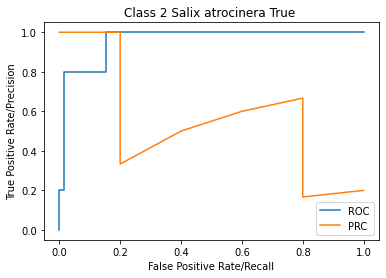

PRC AUC:0.5566666666666666
ROC AUC:0.9603053435114504


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr2, tpr2, thresholds2 = roc_curve(DataActions_true[:,1], probs[:,1])
prec2, recall2, thresholds2 = precision_recall_curve(DataActions_true[:,1], probs[:,1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 2 Salix atrocinera True ')
plt.show()
plt.savefig("Class 2 Salix atrocinera LCS true.png")

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

In [ ]:
score_true_2=[]

In [ ]:
for x in range(0,136):
  if probs[x][1]>=0.5:
    score_true_2.append(1)
  else:
    score_true_2.append(0)

score_true_2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_2=[]

In [ ]:
for x in range(0,136):
  if score_true_2[x]!=DataActions_true[x,1]:
    score_true_index_2.append(x+1)

In [ ]:
score_true_index_2

[34, 60, 93, 108, 116]

### Class 3: Populus nigra

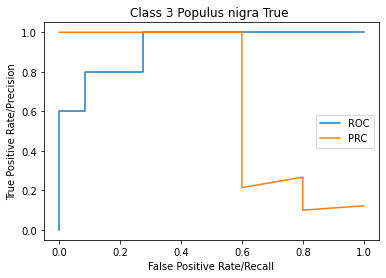

PRC AUC:0.6702903600464576
ROC AUC:0.9282442748091604


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr3, tpr3, thresholds3 = roc_curve(DataActions_true[:,2], probs[:,2])
prec3, recall3, thresholds3 = precision_recall_curve(DataActions_true[:,2], probs[:,2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 3 Populus nigra True ')
plt.show()
plt.savefig("Class 3 Populus nigra LCS true.png")

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

In [ ]:
score_true_3=[]

In [ ]:
for x in range(0,136):
  if probs[x][2]>=0.5:
    score_true_3.append(1)
  else:
    score_true_3.append(0)

score_true_3

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_3=[]

In [ ]:
for x in range(0,136):
  if score_true_3[x]!=DataActions_true[x,2]:
    score_true_index_3.append(x+1)

In [ ]:
score_true_index_3

[31, 65, 68, 97, 129]

### Class 4: Alnus sp.

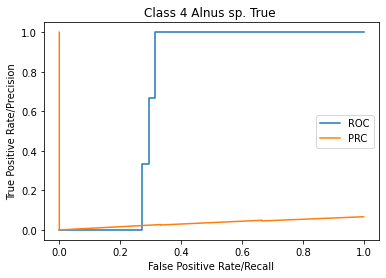

PRC AUC:0.03548812115885287
ROC AUC:0.7067669172932332


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr4, tpr4, thresholds4 = roc_curve(DataActions_true[:,3], probs[:,3])
prec4, recall4, thresholds4 = precision_recall_curve(DataActions_true[:,3], probs[:,3])

plt.plot(fpr4,tpr4,label="ROC")
plt.plot(recall4,prec4,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 4 Alnus sp. True ')
plt.show()
plt.savefig("Class 4 Alnus sp LCS true.png")

print("PRC AUC:" + str(auc(recall4, prec4)))
print("ROC AUC:" + str(auc(fpr4, tpr4)))

In [ ]:
score_true_4=[]

In [ ]:
for x in range(0,136):
  if probs[x][3]>=0.5:
    score_true_4.append(1)
  else:
    score_true_4.append(0)

score_true_4

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_4=[]

In [ ]:
for x in range(0,136):
  if score_true_4[x]!=DataActions_true[x,3]:
    score_true_index_4.append(x+1)

In [ ]:
score_true_index_4

[67, 70, 120]

### Class 5: Quercus robur

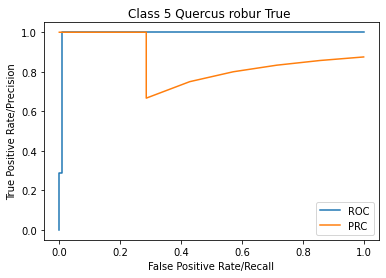

PRC AUC:0.8587585034013605
ROC AUC:0.9944629014396457


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr5, tpr5, thresholds5 = roc_curve(DataActions_true[:,4], probs[:,4])
prec5, recall5, thresholds5 = precision_recall_curve(DataActions_true[:,4], probs[:,4])

plt.plot(fpr5,tpr5,label="ROC")
plt.plot(recall5,prec5,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 5 Quercus robur True ')
plt.show()
plt.savefig("Class 5 Quercus robur LCS true.png")

print("PRC AUC:" + str(auc(recall5, prec5)))
print("ROC AUC:" + str(auc(fpr5, tpr5)))

In [ ]:
score_true_5=[]

In [ ]:
for x in range(0,136):
  if probs[x][4]>=0.5:
    score_true_5.append(1)
  else:
    score_true_5.append(0)

score_true_5

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_5=[]

In [ ]:
for x in range(0,136):
  if score_true_5[x]!=DataActions_true[x,4]:
    score_true_index_5.append(x+1)

In [ ]:
score_true_index_5

[40, 58, 77, 85, 95, 112, 125]

### Class 6: Crataegus monogyna

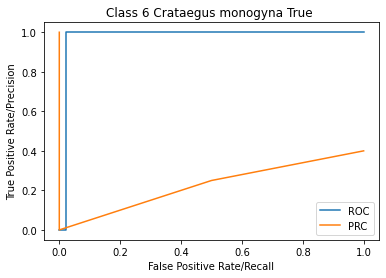

PRC AUC:0.225
ROC AUC:0.9776119402985075


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr6, tpr6, thresholds6 = roc_curve(DataActions_true[:,5], probs[:,5])
prec6, recall6, thresholds6 = precision_recall_curve(DataActions_true[:,5], probs[:,5])

plt.plot(fpr6,tpr6,label="ROC")
plt.plot(recall6,prec6,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 6 Crataegus monogyna True ')
plt.show()
plt.savefig("Class 6 Crataegus monogyna LCS true.png")

print("PRC AUC:" + str(auc(recall6, prec6)))
print("ROC AUC:" + str(auc(fpr6, tpr6)))

In [ ]:
score_true_6=[]

In [ ]:
for x in range(0,136):
  if probs[x][5]>=0.5:
    score_true_6.append(1)
  else:
    score_true_6.append(0)

score_true_6

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_6=[]

In [ ]:
for x in range(0,136):
  if score_true_6[x]!=DataActions_true[x,5]:
    score_true_index_6.append(x+1)

In [ ]:
score_true_index_6

[2, 92]

### Class 7: Hex aquifolium

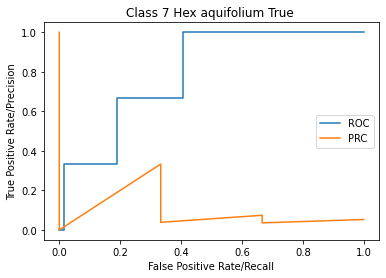

PRC AUC:0.08903580175510001
ROC AUC:0.7969924812030076


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr7, tpr7, thresholds7 = roc_curve(DataActions_true[:,6], probs[:,6])
prec7, recall7, thresholds7 = precision_recall_curve(DataActions_true[:,6], probs[:,6])

plt.plot(fpr7,tpr7,label="ROC")
plt.plot(recall7,prec7,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 7 Hex aquifolium True ')
plt.show()
plt.savefig("Class 7 Hex aquifolium LCS true.png")

print("PRC AUC:" + str(auc(recall7, prec7)))
print("ROC AUC:" + str(auc(fpr7, tpr7)))

In [ ]:
score_true_7=[]

In [ ]:
for x in range(0,136):
  if probs[x][6]>=0.5:
    score_true_7.append(1)
  else:
    score_true_7.append(0)

score_true_7

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_7=[]

In [ ]:
for x in range(0,136):
  if score_true_7[x]!=DataActions_true[x,6]:
    score_true_index_7.append(x+1)

In [ ]:
score_true_index_7

[5, 44, 127]

### Class 8: Nerium oleander

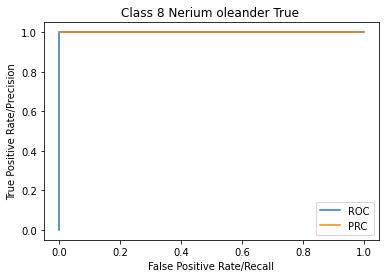

PRC AUC:1.0
ROC AUC:1.0


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr8, tpr8, thresholds8 = roc_curve(DataActions_true[:,7], probs[:,7])
prec8, recall8, thresholds8 = precision_recall_curve(DataActions_true[:,7], probs[:,7])

plt.plot(fpr8,tpr8,label="ROC")
plt.plot(recall8,prec8,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 8 Nerium oleander True ')
plt.show()
plt.savefig("Class 8 Nerium oleander LCS true.png")

print("PRC AUC:" + str(auc(recall8, prec8)))
print("ROC AUC:" + str(auc(fpr8, tpr8)))

In [ ]:
score_true_8=[]

In [ ]:
for x in range(0,136):
  if probs[x][7]>=0.5:
    score_true_8.append(1)
  else:
    score_true_8.append(0)

score_true_8

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_8=[]

In [ ]:
for x in range(0,136):
  if score_true_8[x]!=DataActions_true[x,7]:
    score_true_index_8.append(x+1)

In [ ]:
score_true_index_8

[87, 104, 105, 126]

### Class 9: Betula pubescens

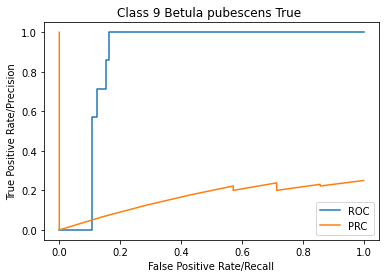

PRC AUC:0.16425595879377394
ROC AUC:0.8748615725359911


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr9, tpr9, thresholds9 = roc_curve(DataActions_true[:,8], probs[:,8])
prec9, recall9, thresholds9 = precision_recall_curve(DataActions_true[:,8], probs[:,8])

plt.plot(fpr9,tpr9,label="ROC")
plt.plot(recall9,prec9,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 9 Betula pubescens True ')
plt.show()
plt.savefig("Class 9 Betula pubescens LCS true.png")

print("PRC AUC:" + str(auc(recall9, prec9)))
print("ROC AUC:" + str(auc(fpr9, tpr9)))

In [ ]:
score_true_9=[]

In [ ]:
for x in range(0,136):
  if probs[x][8]>=0.5:
    score_true_9.append(1)
  else:
    score_true_9.append(0)

score_true_9

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_9=[]

In [ ]:
for x in range(0,136):
  if score_true_9[x]!=DataActions_true[x,8]:
    score_true_index_9.append(x+1)

In [ ]:
score_true_index_9

[6, 21, 38, 89, 109, 110, 118]

### Class 10: Tilia tomentosa

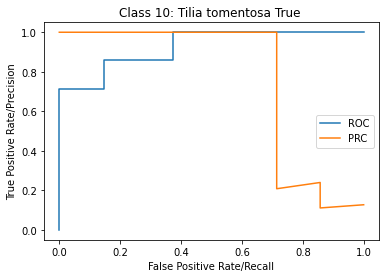

PRC AUC:0.7633369408369408
ROC AUC:0.9258028792912514


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr10, tpr10, thresholds10 = roc_curve(DataActions_true[:,9], probs[:,9])
prec10, recall10, thresholds10 = precision_recall_curve(DataActions_true[:,9], probs[:,9])

plt.plot(fpr10,tpr10,label="ROC")
plt.plot(recall10,prec10,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 10: Tilia tomentosa True ')
plt.show()
plt.savefig("Class 10 Tilia tomentosa LCS true.png")

print("PRC AUC:" + str(auc(recall10, prec10)))
print("ROC AUC:" + str(auc(fpr10, tpr10)))

In [ ]:
score_true_10=[]

In [ ]:
for x in range(0,136):
  if probs[x][9]>=0.5:
    score_true_10.append(1)
  else:
    score_true_10.append(0)

score_true_10

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_10=[]

In [ ]:
for x in range(0,136):
  if score_true_10[x]!=DataActions_true[x,9]:
    score_true_index_10.append(x+1)

In [ ]:
score_true_index_10

[3, 29, 66, 79, 88, 123, 132]

### Class 11: Acer palmatum

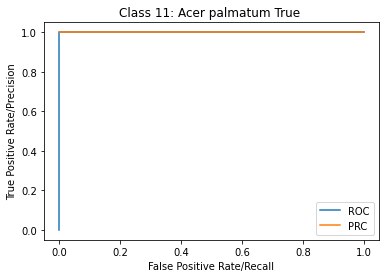

PRC AUC:1.0
ROC AUC:1.0


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr11, tpr11, thresholds11 = roc_curve(DataActions_true[:,10], probs[:,10])
prec11, recall11, thresholds11 = precision_recall_curve(DataActions_true[:,10], probs[:,10])

plt.plot(fpr11,tpr11,label="ROC")
plt.plot(recall11,prec11,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 11: Acer palmatum True ')
plt.show()
plt.savefig("Class 11 Acer palmatum LCS true.png")

print("PRC AUC:" + str(auc(recall11, prec11)))
print("ROC AUC:" + str(auc(fpr11, tpr11)))

In [ ]:
score_true_11=[]

In [ ]:
for x in range(0,136):
  if probs[x][10]>=0.5:
    score_true_11.append(1)
  else:
    score_true_11.append(0)

score_true_11

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_11=[]

In [ ]:
for x in range(0,136):
  if score_true_11[x]!=DataActions_true[x,10]:
    score_true_index_11.append(x+1)

In [ ]:
score_true_index_11

[39, 103]

### Class 12: Celtis sp.

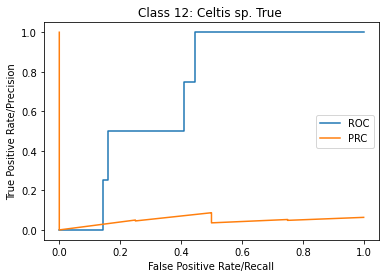

PRC AUC:0.04782951151519838
ROC AUC:0.7102272727272727


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr12, tpr12, thresholds12 = roc_curve(DataActions_true[:,11], probs[:,11])
prec12, recall12, thresholds12 = precision_recall_curve(DataActions_true[:,11], probs[:,11])

plt.plot(fpr12,tpr12,label="ROC")
plt.plot(recall12,prec12,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 12: Celtis sp. True ')
plt.show()
plt.savefig("Class 12 Celtis sp LCS true.png")

print("PRC AUC:" + str(auc(recall12, prec12)))
print("ROC AUC:" + str(auc(fpr12, tpr12)))

In [ ]:
score_true_12=[]

In [ ]:
for x in range(0,136):
  if probs[x][11]>=0.5:
    score_true_12.append(1)
  else:
    score_true_12.append(0)

score_true_12

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_12=[]

In [ ]:
for x in range(0,136):
  if score_true_12[x]!=DataActions_true[x,11]:
    score_true_index_12.append(x+1)

In [ ]:
score_true_index_12

[10, 113, 131, 136]

### Class 13: Corylus avellana

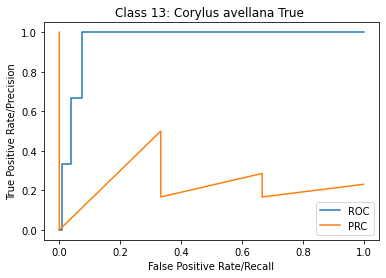

PRC AUC:0.22496947496947495
ROC AUC:0.9598997493734336


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr13, tpr13, thresholds13 = roc_curve(DataActions_true[:,12], probs[:,12])
prec13, recall13, thresholds13 = precision_recall_curve(DataActions_true[:,12], probs[:,12])

plt.plot(fpr13,tpr13,label="ROC")
plt.plot(recall13,prec13,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 13: Corylus avellana True ')
plt.show()
plt.savefig("Class 13 Corylus avellana LCS true.png")

print("PRC AUC:" + str(auc(recall13, prec13)))
print("ROC AUC:" + str(auc(fpr13, tpr13)))

In [ ]:
score_true_13=[]

In [ ]:
for x in range(0,136):
  if probs[x][12]>=0.5:
    score_true_13.append(1)
  else:
    score_true_13.append(0)

score_true_13

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_13=[]

In [ ]:
for x in range(0,136):
  if score_true_13[x]!=DataActions_true[x,12]:
    score_true_index_13.append(x+1)

In [ ]:
score_true_index_13

[45, 80, 117]

### Class 14: Castanea sativa

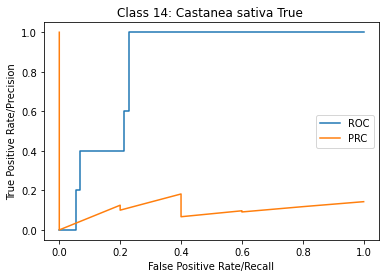

PRC AUC:0.10393193934465281
ROC AUC:0.8412213740458016


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr14, tpr14, thresholds14 = roc_curve(DataActions_true[:,13], probs[:,13])
prec14, recall14, thresholds14 = precision_recall_curve(DataActions_true[:,13], probs[:,13])

plt.plot(fpr14,tpr14,label="ROC")
plt.plot(recall14,prec14,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 14: Castanea sativa True ')
plt.show()
plt.savefig("Class 14 Castanea sativa LCS true.png")

print("PRC AUC:" + str(auc(recall14, prec14)))
print("ROC AUC:" + str(auc(fpr14, tpr14)))

In [ ]:
score_true_14=[]

In [ ]:
for x in range(0,136):
  if probs[x][13]>=0.5:
    score_true_14.append(1)
  else:
    score_true_14.append(0)

score_true_14

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_14=[]

In [ ]:
for x in range(0,136):
  if score_true_14[x]!=DataActions_true[x,13]:
    score_true_index_14.append(x+1)

In [ ]:
score_true_index_14

[50, 71, 94, 102, 111]

### Class 15: Populus alba

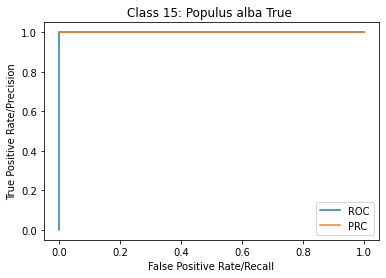

PRC AUC:1.0
ROC AUC:1.0


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr15, tpr15, thresholds15 = roc_curve(DataActions_true[:,14], probs[:,14])
prec15, recall15, thresholds15 = precision_recall_curve(DataActions_true[:,14], probs[:,14])

plt.plot(fpr15,tpr15,label="ROC")
plt.plot(recall15,prec15,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 15: Populus alba True ')
plt.show()
plt.savefig("Class 15 Populus alba LCS true.png")

print("PRC AUC:" + str(auc(recall15, prec15)))
print("ROC AUC:" + str(auc(fpr15, tpr15)))

In [ ]:
score_true_15=[]

In [ ]:
for x in range(0,136):
  if probs[x][14]>=0.5:
    score_true_15.append(1)
  else:
    score_true_15.append(0)

score_true_15

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0]

In [ ]:
score_true_index_15=[]

In [ ]:
for x in range(0,136):
  if score_true_15[x]!=DataActions_true[x,14]:
    score_true_index_15.append(x+1)

In [ ]:
score_true_index_15

[33, 43, 134]

## 22-36

### Class 22: Primula vulgaris

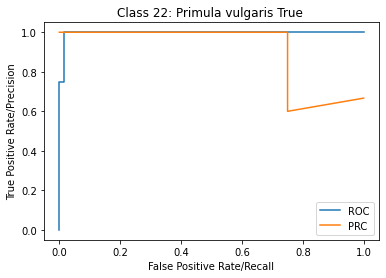

PRC AUC:0.9083333333333333
ROC AUC:0.9962121212121212


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr22, tpr22, thresholds22 = roc_curve(DataActions_true[:,15], probs[:,15])
prec22, recall22, thresholds22 = precision_recall_curve(DataActions_true[:,15], probs[:,15])

plt.plot(fpr22,tpr22,label="ROC")
plt.plot(recall22,prec22,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 22: Primula vulgaris True ')
plt.show()
plt.savefig("Class 22 Primula vulgaris LCS true.png")

print("PRC AUC:" + str(auc(recall22, prec22)))
print("ROC AUC:" + str(auc(fpr22, tpr22)))

In [ ]:
score_true_22=[]

In [ ]:
for x in range(0,136):
  if probs[x][15]>=0.5:
    score_true_22.append(1)
  else:
    score_true_22.append(0)

score_true_22

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_22=[]

In [ ]:
for x in range(0,136):
  if score_true_22[x]!=DataActions_true[x,15]:
    score_true_index_22.append(x+1)

In [ ]:
score_true_index_22

[14, 17, 75, 76]

### Class 23: Erodium sp.

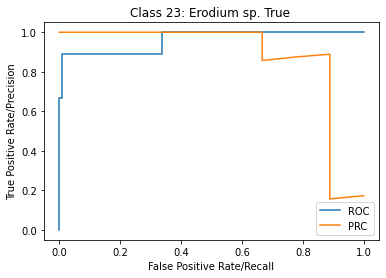

PRC AUC:0.879220634122595
ROC AUC:0.9606299212598425


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr23, tpr23, thresholds23 = roc_curve(DataActions_true[:,16], probs[:,16])
prec23, recall23, thresholds23 = precision_recall_curve(DataActions_true[:,16], probs[:,16])

plt.plot(fpr23,tpr23,label="ROC")
plt.plot(recall23,prec23,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 23: Erodium sp. True ')
plt.show()
plt.savefig("Class 23 Erodium sp. LCS true.png")

print("PRC AUC:" + str(auc(recall23, prec23)))
print("ROC AUC:" + str(auc(fpr23, tpr23)))

In [ ]:
score_true_23=[]

In [ ]:
for x in range(0,136):
  if probs[x][16]>=0.5:
    score_true_23.append(1)
  else:
    score_true_23.append(0)

score_true_23

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_23=[]

In [ ]:
for x in range(0,136):
  if score_true_23[x]!=DataActions_true[x,16]:
    score_true_index_23.append(x+1)

In [ ]:
score_true_index_23

[9, 22, 32, 42, 46, 86, 91, 115, 124]

### Class 24: Bougainvillea sp. 

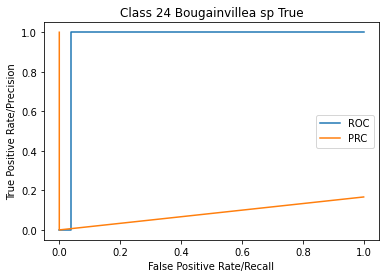

PRC AUC:0.08333333333333333
ROC AUC:0.962962962962963


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr24, tpr24, thresholds24 = roc_curve(DataActions_true[:,17], probs[:,17])
prec24, recall24, thresholds24 = precision_recall_curve(DataActions_true[:,17], probs[:,17])

plt.plot(fpr24,tpr24,label="ROC")
plt.plot(recall24,prec24,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 24 Bougainvillea sp True')
plt.show()
plt.savefig("Class 24 Bougainvillea sp LCS true.png")

print("PRC AUC:" + str(auc(recall24, prec24)))
print("ROC AUC:" + str(auc(fpr24, tpr24)))

In [ ]:
score_true_24=[]

In [ ]:
for x in range(0,136):
  if probs[x][17]>=0.5:
    score_true_24.append(1)
  else:
    score_true_24.append(0)

score_true_24

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_24=[]

In [ ]:
for x in range(0,136):
  if score_true_24[x]!=DataActions_true[x,17]:
    score_true_index_24.append(x+1)

In [ ]:
score_true_index_24

[101]

### Class 25: Arisarum vulgare

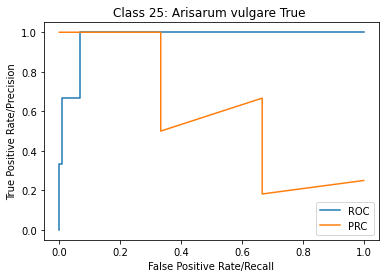

PRC AUC:0.5997474747474747
ROC AUC:0.9749373433583959


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr25, tpr25, thresholds25 = roc_curve(DataActions_true[:,18], probs[:,18])
prec25, recall25, thresholds25 = precision_recall_curve(DataActions_true[:,18], probs[:,18])

plt.plot(fpr25,tpr25,label="ROC")
plt.plot(recall25,prec25,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 25: Arisarum vulgare True ')
plt.show()
plt.savefig("Class 25 Arisarum vulgare LCS true.png")

print("PRC AUC:" + str(auc(recall25, prec25)))
print("ROC AUC:" + str(auc(fpr25, tpr25)))

In [ ]:
score_true_25=[]

In [ ]:
for x in range(0,136):
  if probs[x][18]>=0.5:
    score_true_25.append(1)
  else:
    score_true_25.append(0)

score_true_25

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_25=[]

In [ ]:
for x in range(0,136):
  if score_true_25[x]!=DataActions_true[x,18]:
    score_true_index_25.append(x+1)

In [ ]:
score_true_index_25

[27, 35, 53]

### Class 26: Enonymus japonicus

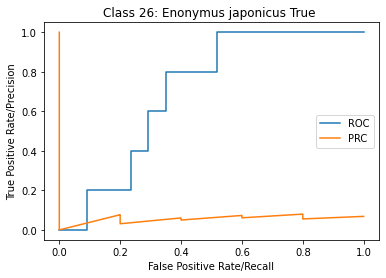

PRC AUC:0.055722306527286
ROC AUC:0.7022900763358779


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr26, tpr26, thresholds26 = roc_curve(DataActions_true[:,19], probs[:,19])
prec26, recall26, thresholds26 = precision_recall_curve(DataActions_true[:,19], probs[:,19])

plt.plot(fpr26,tpr26,label="ROC")
plt.plot(recall26,prec26,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 26: Enonymus japonicus True ')
plt.show()
plt.savefig("Class 26 Enonymus japonicus LCS true.png")

print("PRC AUC:" + str(auc(recall26, prec26)))
print("ROC AUC:" + str(auc(fpr26, tpr26)))

In [ ]:
score_true_26=[]

In [ ]:
for x in range(0,136):
  if probs[x][19]>=0.5:
    score_true_26.append(1)
  else:
    score_true_26.append(0)

score_true_26

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_26=[]

In [ ]:
for x in range(0,136):
  if score_true_26[x]!=DataActions_true[x,19]:
    score_true_index_26.append(x+1)

In [ ]:
score_true_index_26

[28, 37, 62, 83, 135]

### Class 27: Ilex perado ssp. azorica

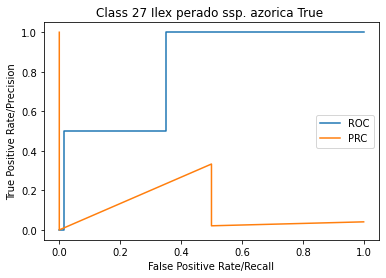

PRC AUC:0.09874574829931973
ROC AUC:0.8171641791044776


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr27, tpr27, thresholds27 = roc_curve(DataActions_true[:,20], probs[:,20])
prec27, recall27, thresholds27 = precision_recall_curve(DataActions_true[:,20], probs[:,20])

plt.plot(fpr27,tpr27,label="ROC")
plt.plot(recall27,prec27,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 27 Ilex perado ssp. azorica True ')
plt.show()
plt.savefig("Class 27 Ilex perado ssp azorica LCS true.png")

print("PRC AUC:" + str(auc(recall27, prec27)))
print("ROC AUC:" + str(auc(fpr27, tpr27)))

In [ ]:
score_true_27=[]

In [ ]:
for x in range(0,136):
  if probs[x][20]>=0.5:
    score_true_27.append(1)
  else:
    score_true_27.append(0)

score_true_27

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_27=[]

In [ ]:
for x in range(0,136):
  if score_true_27[x]!=DataActions_true[x,20]:
    score_true_index_27.append(x+1)

In [ ]:
score_true_index_27

[20, 78]

### Class 28: Magnolia soulangeana

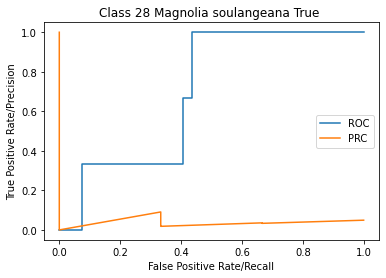

PRC AUC:0.0378864760012301
ROC AUC:0.6942355889724311


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr28, tpr28, thresholds28 = roc_curve(DataActions_true[:,21], probs[:,21])
prec28, recall28, thresholds28 = precision_recall_curve(DataActions_true[:,21], probs[:,21])

plt.plot(fpr28,tpr28,label="ROC")
plt.plot(recall28,prec28,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 28 Magnolia soulangeana True ')
plt.show()
plt.savefig("Class 28 Magnolia soulangeana LCS true.png")

print("PRC AUC:" + str(auc(recall28, prec28)))
print("ROC AUC:" + str(auc(fpr28, tpr28)))

In [ ]:
score_true_28=[]

In [ ]:
for x in range(0,136):
  if probs[x][21]>=0.5:
    score_true_28.append(1)
  else:
    score_true_28.append(0)

score_true_28

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_28=[]

In [ ]:
for x in range(0,136):
  if score_true_28[x]!=DataActions_true[x,21]:
    score_true_index_28.append(x+1)

In [ ]:
score_true_index_28

[7, 48, 59]

### Class 29: Buxus sempervirens

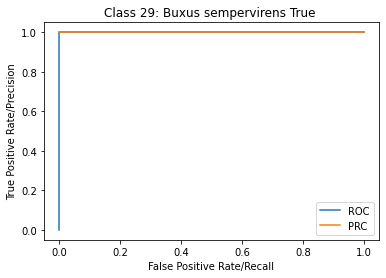

PRC AUC:1.0
ROC AUC:1.0


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr29, tpr29, thresholds29 = roc_curve(DataActions_true[:,22], probs[:,22])
prec29, recall29, thresholds29 = precision_recall_curve(DataActions_true[:,22], probs[:,22])

plt.plot(fpr29,tpr29,label="ROC")
plt.plot(recall29,prec29,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 29: Buxus sempervirens True ')
plt.show()
plt.savefig("Class 29: Buxus sempervirens LCS true.png")

print("PRC AUC:" + str(auc(recall29, prec29)))
print("ROC AUC:" + str(auc(fpr29, tpr29)))

In [ ]:
score_true_29=[]

In [ ]:
for x in range(0,136):
  if probs[x][22]>=0.5:
    score_true_29.append(1)
  else:
    score_true_29.append(0)

score_true_29

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_29=[]

In [ ]:
for x in range(0,136):
  if score_true_29[x]!=DataActions_true[x,22]:
    score_true_index_29.append(x+1)

In [ ]:
score_true_index_29

[11, 41, 57, 73, 99]

### Class 30: Urtica dioca

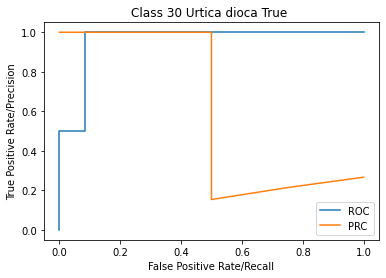

PRC AUC:0.6061355311355312
ROC AUC:0.9583333333333333


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr30, tpr30, thresholds30 = roc_curve(DataActions_true[:,23], probs[:,23])
prec30, recall30, thresholds30 = precision_recall_curve(DataActions_true[:,23], probs[:,23])

plt.plot(fpr30,tpr30,label="ROC")
plt.plot(recall30,prec30,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 30 Urtica dioca True ')
plt.show()
plt.savefig("Class 30 Urtica dioca LCS true.png")

print("PRC AUC:" + str(auc(recall30, prec30)))
print("ROC AUC:" + str(auc(fpr30, tpr30)))

In [ ]:
score_true_30=[]

In [ ]:
for x in range(0,136):
  if probs[x][23]>=0.5:
    score_true_30.append(1)
  else:
    score_true_30.append(0)

score_true_30

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_30=[]

In [ ]:
for x in range(0,136):
  if score_true_30[x]!=DataActions_true[x,23]:
    score_true_index_30.append(x+1)

In [ ]:
score_true_index_30

[26, 84, 96, 119]

### Class 31: Podocarpus sp.

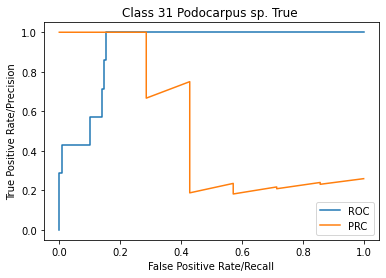

PRC AUC:0.5126451495601112
ROC AUC:0.9213732004429678


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr31, tpr31, thresholds31 = roc_curve(DataActions_true[:,24], probs[:,24])
prec31, recall31, thresholds31 = precision_recall_curve(DataActions_true[:,24], probs[:,24])

plt.plot(fpr31,tpr31,label="ROC")
plt.plot(recall31,prec31,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 31 Podocarpus sp. True ')
plt.show()
plt.savefig("Class 31 Podocarpus sp. LCS true.png")

print("PRC AUC:" + str(auc(recall31, prec31)))
print("ROC AUC:" + str(auc(fpr31, tpr31)))

In [ ]:
score_true_31=[]

In [ ]:
for x in range(0,136):
  if probs[x][24]>=0.5:
    score_true_31.append(1)
  else:
    score_true_31.append(0)

score_true_31

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_31=[]

In [ ]:
for x in range(0,136):
  if score_true_31[x]!=DataActions_true[x,24]:
    score_true_index_31.append(x+1)

In [ ]:
score_true_index_31

[13, 23, 47, 49, 63, 69, 122]

### Class 32: Acca sellowiana

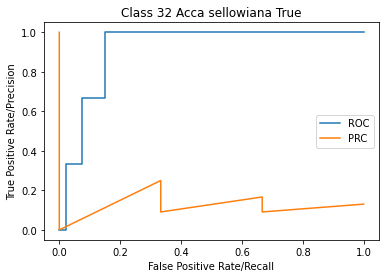

PRC AUC:0.12148660518225735
ROC AUC:0.9172932330827068


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr32, tpr32, thresholds32 = roc_curve(DataActions_true[:,25], probs[:,25])
prec32, recall32, thresholds32 = precision_recall_curve(DataActions_true[:,25], probs[:,25])

plt.plot(fpr32,tpr32,label="ROC")
plt.plot(recall32,prec32,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 32 Acca sellowiana True')
plt.show()
plt.savefig("Class 32 Acca sellowiana LCS true.png")

print("PRC AUC:" + str(auc(recall32, prec32)))
print("ROC AUC:" + str(auc(fpr32, tpr32)))

In [ ]:
score_true_32=[]

In [ ]:
for x in range(0,136):
  if probs[x][24]>=0.5:
    score_true_32.append(1)
  else:
    score_true_32.append(0)

score_true_32

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_32=[]

In [ ]:
for x in range(0,136):
  if score_true_32[x]!=DataActions_true[x,25]:
    score_true_index_32.append(x+1)

In [ ]:
score_true_index_32

[54, 107, 121]

### Class 33: Hydrangea sp.

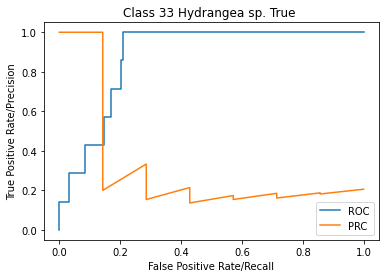

PRC AUC:0.3062331484056029
ROC AUC:0.8792912513842746


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr33, tpr33, thresholds33 = roc_curve(DataActions_true[:,26], probs[:,26])
prec33, recall33, thresholds33 = precision_recall_curve(DataActions_true[:,26], probs[:,26])

plt.plot(fpr33,tpr33,label="ROC")
plt.plot(recall33,prec33,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 33 Hydrangea sp. True ')
plt.show()
plt.savefig("Class 33 Hydrangea sp LCS true.png")

print("PRC AUC:" + str(auc(recall33, prec33)))
print("ROC AUC:" + str(auc(fpr33, tpr33)))

In [ ]:
score_true_33=[]

In [ ]:
for x in range(0,136):
  if probs[x][26]>=0.5:
    score_true_33.append(1)
  else:
    score_true_33.append(0)

score_true_33

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_33=[]

In [ ]:
for x in range(0,136):
  if score_true_33[x]!=DataActions_true[x,26]:
    score_true_index_33.append(x+1)

In [ ]:
score_true_index_33

[19, 24, 52, 55, 72, 114, 130]

### Class 34: Pseudosasa japonica

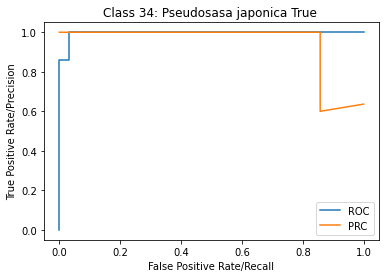

PRC AUC:0.9454545454545453
ROC AUC:0.9955703211517164


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr34, tpr34, thresholds34 = roc_curve(DataActions_true[:,27], probs[:,27])
prec34, recall34, thresholds34 = precision_recall_curve(DataActions_true[:,27], probs[:,27])

plt.plot(fpr34,tpr34,label="ROC")
plt.plot(recall34,prec34,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 34: Pseudosasa japonica True ')
plt.show()
plt.savefig("Class 34 Pseudosasa japonica LCS true.png")

print("PRC AUC:" + str(auc(recall34, prec34)))
print("ROC AUC:" + str(auc(fpr34, tpr34)))

In [ ]:
score_true_34=[]

In [ ]:
for x in range(0,136):
  if probs[x][27]>=0.5:
    score_true_34.append(1)
  else:
    score_true_34.append(0)

score_true_34

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_34=[]

In [ ]:
for x in range(0,136):
  if score_true_34[x]!=DataActions_true[x,27]:
    score_true_index_34.append(x+1)

In [ ]:
score_true_index_34

[4, 8, 15, 25, 30, 61, 82]

### Class 35: Magnolia grandiflora

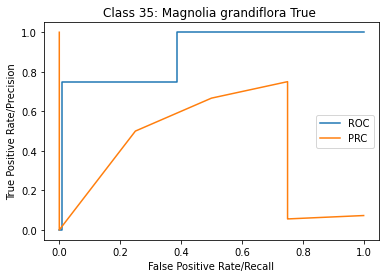

PRC AUC:0.4014520202020202
ROC AUC:0.8977272727272727


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr35, tpr35, thresholds35 = roc_curve(DataActions_true[:,28], probs[:,28])
prec35, recall35, thresholds35 = precision_recall_curve(DataActions_true[:,28], probs[:,28])

plt.plot(fpr35,tpr35,label="ROC")
plt.plot(recall35,prec35,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 35: Magnolia grandiflora True ')
plt.show()
plt.savefig("Class 35 Magnolia grandiflora LCS true.png")

print("PRC AUC:" + str(auc(recall35, prec35)))
print("ROC AUC:" + str(auc(fpr35, tpr35)))

In [ ]:
score_true_35=[]

In [ ]:
for x in range(0,136):
  if probs[x][28]>=0.5:
    score_true_35.append(1)
  else:
    score_true_35.append(0)

score_true_35

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_35=[]

In [ ]:
for x in range(0,136):
  if score_true_35[x]!=DataActions_true[x,28]:
    score_true_index_35.append(x+1)

In [ ]:
score_true_index_35

[56, 64, 90, 106]

### Class 36: Geranium sp.

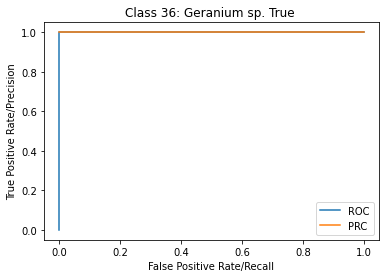

PRC AUC:1.0
ROC AUC:1.0


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr36, tpr36, thresholds36 = roc_curve(DataActions_true[:,29], probs[:,29])
prec36, recall36, thresholds36 = precision_recall_curve(DataActions_true[:,29], probs[:,29])

plt.plot(fpr36,tpr36,label="ROC")
plt.plot(recall36,prec36,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 36: Geranium sp. True ')
plt.show()
plt.savefig("Class 36 Geranium sp LCS true.png")

print("PRC AUC:" + str(auc(recall36, prec36)))
print("ROC AUC:" + str(auc(fpr36, tpr36)))

In [ ]:
score_true_36=[]

In [ ]:
for x in range(0,136):
  if probs[x][29]>=0.5:
    score_true_36.append(1)
  else:
    score_true_36.append(0)

score_true_36

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_true_index_36=[]

In [ ]:
for x in range(0,136):
  if score_true_36[x]!=DataActions_true[x,29]:
    score_true_index_36.append(x+1)

In [ ]:
score_true_index_36

[]

# False curve

## 1-15

### Class 1: Quercus suber

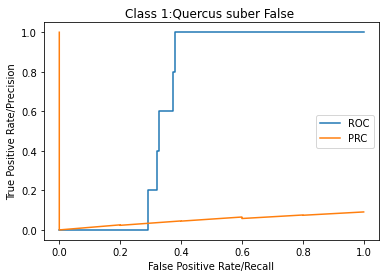

PRC AUC:0.05021603915865319
ROC AUC:0.6610687022900764


<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs_1 = trainedModel.predict_proba(dataFeatures_test)
fpr1, tpr1, thresholds1 = roc_curve(DataActions_test[:,0], probs_1[:,1])
prec1, recall1, thresholds1 = precision_recall_curve(DataActions_test[:,0], probs_1[:,1])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 1:Quercus suber False ')
plt.show()
plt.savefig("Class 1 Quercus suber Neural Network false.png")

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

In [ ]:
score_false_1=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][0]>=0.5:
    score_false_1.append(1)
  else:
    score_false_1.append(0)

score_false_1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_1=[]

In [ ]:
for x in range(0,136):
  if score_false_1[x]!=DataActions_true[x,0]:
    score_false_index_1.append(x+1)

In [ ]:
score_false_index_1

[1, 18, 36, 98, 100]

### Class 2: Salix atrocinera

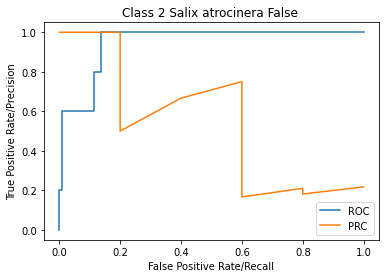

PRC AUC:0.5359735801955481
ROC AUC:0.9465648854961832


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr2, tpr2, thresholds2 = roc_curve(DataActions_test[:,1], probs_1[:,1])
prec2, recall2, thresholds2 = precision_recall_curve(DataActions_test[:,1], probs_1[:,1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 2 Salix atrocinera False ')
plt.show()
plt.savefig("Class 2 Salix atrocinera Neural Network false.png")

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

In [ ]:
score_false_2=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][1]>=0.5:
    score_false_2.append(1)
  else:
    score_false_2.append(0)

score_false_2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_2=[]

In [ ]:
for x in range(0,136):
  if score_false_2[x]!=DataActions_true[x,1]:
    score_false_index_2.append(x+1)

In [ ]:
score_false_index_2

[34, 60, 93, 108, 116]

### Class 3: Populus nigra

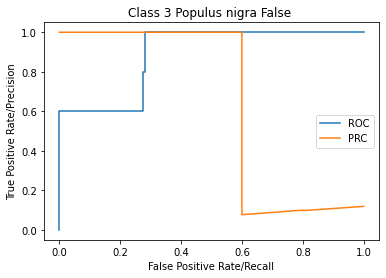

PRC AUC:0.6393531671580452
ROC AUC:0.8885496183206106


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr3, tpr3, thresholds3 = roc_curve(DataActions_test[:,2], probs_1[:,2])
prec3, recall3, thresholds3 = precision_recall_curve(DataActions_test[:,2], probs_1[:,2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 3 Populus nigra False ')
plt.show()
plt.savefig("Class 3 Populus nigra Neural Network false.png")

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

In [ ]:
score_false_3=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][2]>=0.5:
    score_false_3.append(1)
  else:
    score_false_3.append(0)

score_false_3

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_3=[]

In [ ]:
for x in range(0,136):
  if score_false_3[x]!=DataActions_true[x,2]:
    score_false_index_3.append(x+1)

In [ ]:
score_false_index_3

[31, 65, 68, 97, 129]

### Class 4: Alnus sp.

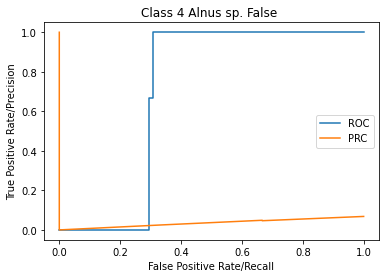

PRC AUC:0.035578988982278834
ROC AUC:0.7017543859649122


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr4, tpr4, thresholds4 = roc_curve(DataActions_test[:,3], probs_1[:,3])
prec4, recall4, thresholds4 = precision_recall_curve(DataActions_test[:,3], probs_1[:,3])

plt.plot(fpr4,tpr4,label="ROC")
plt.plot(recall4,prec4,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 4 Alnus sp. False ')
plt.show()
plt.savefig("Class 4 Alnus sp Neural Network false.png")

print("PRC AUC:" + str(auc(recall4, prec4)))
print("ROC AUC:" + str(auc(fpr4, tpr4)))

In [ ]:
score_false_4=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][3]>=0.5:
    score_false_4.append(1)
  else:
    score_false_4.append(0)

score_false_4

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_4=[]

In [ ]:
for x in range(0,136):
  if score_false_4[x]!=DataActions_true[x,3]:
    score_false_index_4.append(x+1)

In [ ]:
score_false_index_4

[67, 70, 120]

### Class 5: Quercus robur

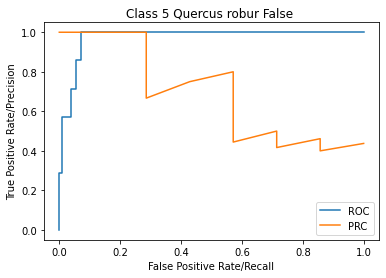

PRC AUC:0.6876297313797314
ROC AUC:0.9745293466223699


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr5, tpr5, thresholds5 = roc_curve(DataActions_test[:,4], probs_1[:,4])
prec5, recall5, thresholds5 = precision_recall_curve(DataActions_test[:,4], probs_1[:,4])

plt.plot(fpr5,tpr5,label="ROC")
plt.plot(recall5,prec5,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 5 Quercus robur False ')
plt.show()
plt.savefig("Class 5 Quercus robur Neural Network false.png")

print("PRC AUC:" + str(auc(recall5, prec5)))
print("ROC AUC:" + str(auc(fpr5, tpr5)))

In [ ]:
score_false_5=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][4]>=0.5:
    score_false_5.append(1)
  else:
    score_false_5.append(0)

score_false_5

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_5=[]

In [ ]:
for x in range(0,136):
  if score_false_5[x]!=DataActions_true[x,4]:
    score_false_index_5.append(x+1)

In [ ]:
score_false_index_5

[40, 58, 77, 85, 95, 112, 125]

### Class 6: Crataegus monogyna

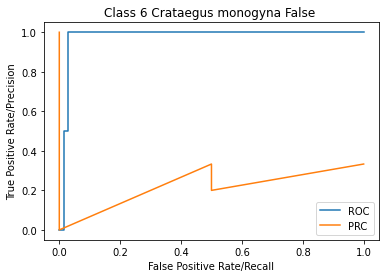

PRC AUC:0.21666666666666667
ROC AUC:0.9776119402985075


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr6, tpr6, thresholds6 = roc_curve(DataActions_test[:,5], probs_1[:,5])
prec6, recall6, thresholds6 = precision_recall_curve(DataActions_test[:,5], probs_1[:,5])

plt.plot(fpr6,tpr6,label="ROC")
plt.plot(recall6,prec6,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 6 Crataegus monogyna False ')
plt.show()
plt.savefig("Class 6 Crataegus monogyna Neural Network false.png")

print("PRC AUC:" + str(auc(recall6, prec6)))
print("ROC AUC:" + str(auc(fpr6, tpr6)))

In [ ]:
score_false_6=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][5]>=0.5:
    score_false_6.append(1)
  else:
    score_false_6.append(0)

score_false_6

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_6=[]

In [ ]:
for x in range(0,136):
  if score_false_6[x]!=DataActions_true[x,5]:
    score_false_index_6.append(x+1)

In [ ]:
score_false_index_6

[2, 92]

### Class 7: Hex aquifolium

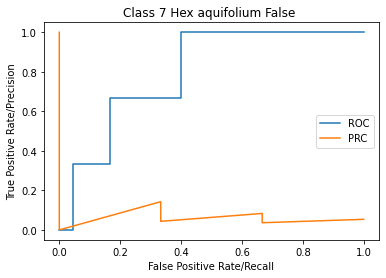

PRC AUC:0.05993396699918439
ROC AUC:0.7969924812030075


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr7, tpr7, thresholds7 = roc_curve(DataActions_test[:,6], probs_1[:,6])
prec7, recall7, thresholds7 = precision_recall_curve(DataActions_test[:,6], probs_1[:,6])

plt.plot(fpr7,tpr7,label="ROC")
plt.plot(recall7,prec7,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 7 Hex aquifolium False ')
plt.show()
plt.savefig("Class 7 Hex aquifolium Neural Network false.png")

print("PRC AUC:" + str(auc(recall7, prec7)))
print("ROC AUC:" + str(auc(fpr7, tpr7)))

In [ ]:
score_false_7=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][6]>=0.5:
    score_false_7.append(1)
  else:
    score_false_7.append(0)

score_false_7

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_7=[]

In [ ]:
for x in range(0,136):
  if score_false_7[x]!=DataActions_true[x,6]:
    score_false_index_7.append(x+1)

In [ ]:
score_false_index_7

[5, 44, 127]

### Class 8: Nerium oleander

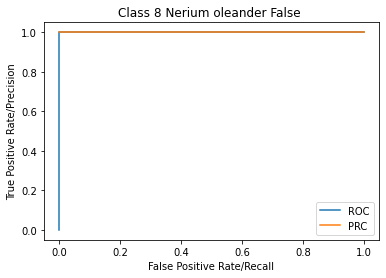

PRC AUC:1.0
ROC AUC:1.0


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr8, tpr8, thresholds8 = roc_curve(DataActions_test[:,7], probs_1[:,7])
prec8, recall8, thresholds8 = precision_recall_curve(DataActions_test[:,7], probs_1[:,7])

plt.plot(fpr8,tpr8,label="ROC")
plt.plot(recall8,prec8,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 8 Nerium oleander False ')
plt.show()
plt.savefig("Class 8 Nerium oleander Neural Network false.png")

print("PRC AUC:" + str(auc(recall8, prec8)))
print("ROC AUC:" + str(auc(fpr8, tpr8)))

In [ ]:
score_false_8=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][7]>=0.5:
    score_false_8.append(1)
  else:
    score_false_8.append(0)

score_false_8

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_8=[]

In [ ]:
for x in range(0,136):
  if score_false_8[x]!=DataActions_true[x,7]:
    score_false_index_8.append(x+1)

In [ ]:
score_false_index_8

[87, 105, 126]

### Class 9: Betula pubescens

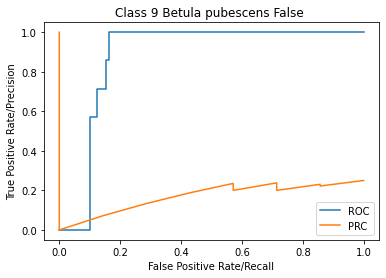

PRC AUC:0.16863604416125424
ROC AUC:0.8792912513842746


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr9, tpr9, thresholds9 = roc_curve(DataActions_test[:,8], probs_1[:,8])
prec9, recall9, thresholds9 = precision_recall_curve(DataActions_test[:,8], probs_1[:,8])

plt.plot(fpr9,tpr9,label="ROC")
plt.plot(recall9,prec9,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 9 Betula pubescens False ')
plt.show()
plt.savefig("Class 9 Betula pubescens Neural Network false.png")

print("PRC AUC:" + str(auc(recall9, prec9)))
print("ROC AUC:" + str(auc(fpr9, tpr9)))

In [ ]:
score_false_9=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][8]>=0.5:
    score_false_9.append(1)
  else:
    score_false_9.append(0)

score_false_9

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_9=[]

In [ ]:
for x in range(0,136):
  if score_false_9[x]!=DataActions_true[x,8]:
    score_false_index_9.append(x+1)

In [ ]:
score_false_index_9

[6, 21, 38, 89, 109, 110, 118]

### Class 10: Tilia tomentosa

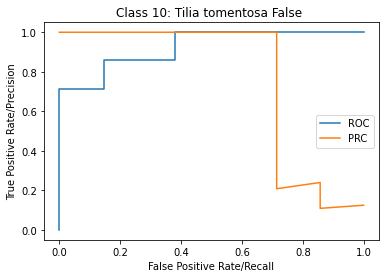

PRC AUC:0.763030303030303
ROC AUC:0.9246954595791805


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr10, tpr10, thresholds10 = roc_curve(DataActions_test[:,9], probs_1[:,9])
prec10, recall10, thresholds10 = precision_recall_curve(DataActions_test[:,9], probs_1[:,9])

plt.plot(fpr10,tpr10,label="ROC")
plt.plot(recall10,prec10,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 10: Tilia tomentosa False ')
plt.show()
plt.savefig("Class 10 Tilia tomentosa Neural Network false.png")

print("PRC AUC:" + str(auc(recall10, prec10)))
print("ROC AUC:" + str(auc(fpr10, tpr10)))

In [ ]:
score_false_10=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][9]>=0.5:
    score_false_10.append(1)
  else:
    score_false_10.append(0)

score_false_10

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_10=[]

In [ ]:
for x in range(0,136):
  if score_false_10[x]!=DataActions_true[x,9]:
    score_false_index_10.append(x+1)

In [ ]:
score_false_index_10

[3, 29, 66, 79, 88, 123, 132]

### Class 11: Acer palmatum

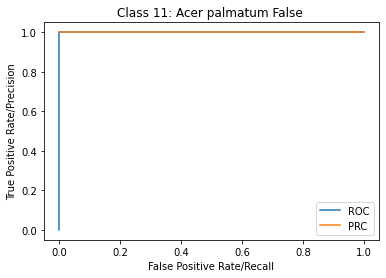

PRC AUC:1.0
ROC AUC:1.0


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr11, tpr11, thresholds11 = roc_curve(DataActions_test[:,10], probs_1[:,10])
prec11, recall11, thresholds11 = precision_recall_curve(DataActions_test[:,10], probs_1[:,10])

plt.plot(fpr11,tpr11,label="ROC")
plt.plot(recall11,prec11,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 11: Acer palmatum False ')
plt.show()
plt.savefig("Class 11 Acer palmatum Neural Network false.png")

print("PRC AUC:" + str(auc(recall11, prec11)))
print("ROC AUC:" + str(auc(fpr11, tpr11)))

In [ ]:
score_false_11=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][10]>=0.5:
    score_false_11.append(1)
  else:
    score_false_11.append(0)

score_false_11

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_11=[]

In [ ]:
for x in range(0,136):
  if score_false_11[x]!=DataActions_true[x,10]:
    score_false_index_11.append(x+1)

In [ ]:
score_false_index_11

[39, 103]

### Class 12: Celtis sp.

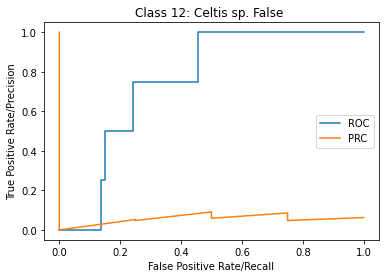

PRC AUC:0.055727072527575625
ROC AUC:0.7537878787878787


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr12, tpr12, thresholds12 = roc_curve(DataActions_test[:,11], probs_1[:,11])
prec12, recall12, thresholds12 = precision_recall_curve(DataActions_test[:,11], probs_1[:,11])

plt.plot(fpr12,tpr12,label="ROC")
plt.plot(recall12,prec12,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 12: Celtis sp. False ')
plt.show()
plt.savefig("Class 12 Celtis sp Neural Network false.png")

print("PRC AUC:" + str(auc(recall12, prec12)))
print("ROC AUC:" + str(auc(fpr12, tpr12)))

In [ ]:
score_false_12=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][11]>=0.5:
    score_false_12.append(1)
  else:
    score_false_12.append(0)

score_false_12

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_12=[]

In [ ]:
for x in range(0,136):
  if score_false_12[x]!=DataActions_true[x,11]:
    score_false_index_12.append(x+1)

In [ ]:
score_false_index_12

[10, 113, 131, 136]

### Class 13: Corylus avellana

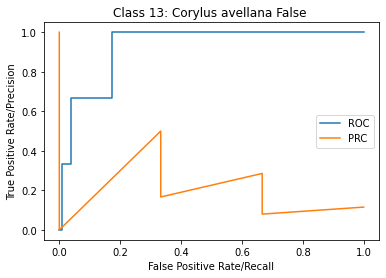

PRC AUC:0.19129426129426128
ROC AUC:0.9273182957393484


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr13, tpr13, thresholds13 = roc_curve(DataActions_test[:,12], probs_1[:,12])
prec13, recall13, thresholds13 = precision_recall_curve(DataActions_test[:,12], probs_1[:,12])

plt.plot(fpr13,tpr13,label="ROC")
plt.plot(recall13,prec13,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 13: Corylus avellana False ')
plt.show()
plt.savefig("Class 13 Corylus avellana Neural Network false.png")

print("PRC AUC:" + str(auc(recall13, prec13)))
print("ROC AUC:" + str(auc(fpr13, tpr13)))

In [ ]:
score_false_13=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][12]>=0.5:
    score_false_13.append(1)
  else:
    score_false_13.append(0)

score_false_13

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_13=[]

In [ ]:
for x in range(0,136):
  if score_false_13[x]!=DataActions_true[x,12]:
    score_false_index_13.append(x+1)

In [ ]:
score_false_index_13

[45, 80, 117]

### Class 14: Castanea sativa

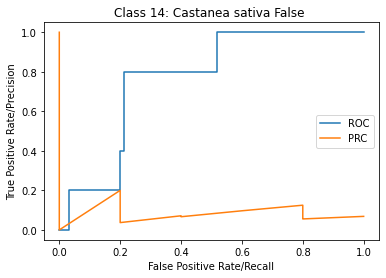

PRC AUC:0.08177293684695364
ROC AUC:0.7648854961832061


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr14, tpr14, thresholds14 = roc_curve(DataActions_test[:,13], probs_1[:,13])
prec14, recall14, thresholds14 = precision_recall_curve(DataActions_test[:,13], probs_1[:,13])

plt.plot(fpr14,tpr14,label="ROC")
plt.plot(recall14,prec14,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 14: Castanea sativa False ')
plt.show()
plt.savefig("Class 14 Castanea sativa Neural Network false.png")

print("PRC AUC:" + str(auc(recall14, prec14)))
print("ROC AUC:" + str(auc(fpr14, tpr14)))

In [ ]:
score_false_14=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][13]>=0.5:
    score_false_14.append(1)
  else:
    score_false_14.append(0)

score_false_14

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_14=[]

In [ ]:
for x in range(0,136):
  if score_false_14[x]!=DataActions_true[x,13]:
    score_false_index_14.append(x+1)

In [ ]:
score_false_index_14

[50, 71, 94, 102, 111]

### Class 15: Populus alba

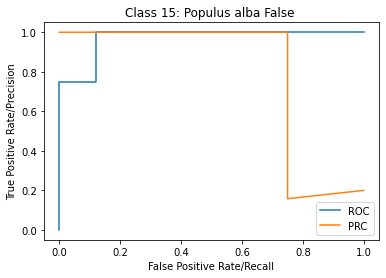

PRC AUC:0.7947368421052632
ROC AUC:0.9696969696969697


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr15, tpr15, thresholds15 = roc_curve(DataActions_test[:,14], probs_1[:,14])
prec15, recall15, thresholds15 = precision_recall_curve(DataActions_test[:,14], probs_1[:,14])

plt.plot(fpr15,tpr15,label="ROC")
plt.plot(recall15,prec15,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 15: Populus alba False ')
plt.show()
plt.savefig("Class 15 Populus alba Neural Network false.png")

print("PRC AUC:" + str(auc(recall15, prec15)))
print("ROC AUC:" + str(auc(fpr15, tpr15)))

In [ ]:
score_false_15=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][14]>=0.5:
    score_false_15.append(1)
  else:
    score_false_15.append(0)

score_false_15

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0]

In [ ]:
score_false_index_15=[]

In [ ]:
for x in range(0,136):
  if score_false_15[x]!=DataActions_true[x,14]:
    score_false_index_15.append(x+1)

In [ ]:
score_false_index_15

[33, 43, 134]

## 22-36

### Class 22: Primula vulgaris

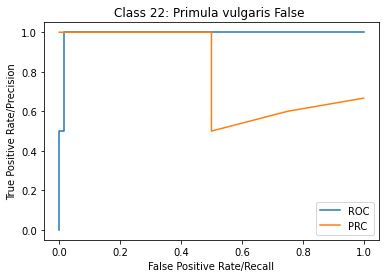

PRC AUC:0.7958333333333334
ROC AUC:0.9924242424242424


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr22, tpr22, thresholds22 = roc_curve(DataActions_test[:,15], probs_1[:,15])
prec22, recall22, thresholds22 = precision_recall_curve(DataActions_test[:,15], probs_1[:,15])

plt.plot(fpr22,tpr22,label="ROC")
plt.plot(recall22,prec22,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 22: Primula vulgaris False ')
plt.show()
plt.savefig("Class 22 Primula vulgaris Neural Network false.png")

print("PRC AUC:" + str(auc(recall22, prec22)))
print("ROC AUC:" + str(auc(fpr22, tpr22)))

In [ ]:
score_false_22=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][15]>=0.5:
    score_false_22.append(1)
  else:
    score_false_22.append(0)

score_false_22

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_22=[]

In [ ]:
for x in range(0,136):
  if score_false_22[x]!=DataActions_true[x,15]:
    score_false_index_22.append(x+1)

In [ ]:
score_false_index_22

[14, 17, 75, 76]

### Class 23: Erodium sp.

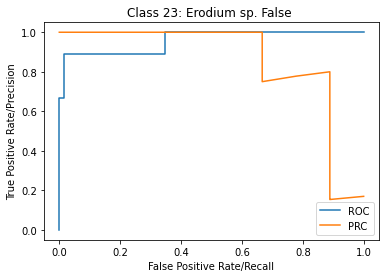

PRC AUC:0.8571785016753573
ROC AUC:0.9580052493438319


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr23, tpr23, thresholds23 = roc_curve(DataActions_test[:,16], probs_1[:,16])
prec23, recall23, thresholds23 = precision_recall_curve(DataActions_test[:,16], probs_1[:,16])

plt.plot(fpr23,tpr23,label="ROC")
plt.plot(recall23,prec23,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 23: Erodium sp. False ')
plt.show()
plt.savefig("Class 23 Erodium sp. Neural Network false.png")

print("PRC AUC:" + str(auc(recall23, prec23)))
print("ROC AUC:" + str(auc(fpr23, tpr23)))

In [ ]:
score_false_23=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][16]>=0.5:
    score_false_23.append(1)
  else:
    score_false_23.append(0)

score_false_23

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_23=[]

In [ ]:
for x in range(0,136):
  if score_false_23[x]!=DataActions_true[x,16]:
    score_false_index_23.append(x+1)

In [ ]:
score_false_index_23

[9, 22, 32, 42, 46, 86, 91, 115, 124]

### Class 24: Bougainvillea sp. 

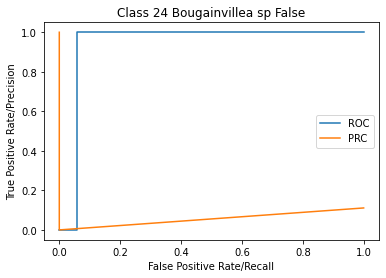

PRC AUC:0.05555555555555555
ROC AUC:0.9407407407407408


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr24, tpr24, thresholds24 = roc_curve(DataActions_test[:,17], probs_1[:,17])
prec24, recall24, thresholds24 = precision_recall_curve(DataActions_test[:,17], probs_1[:,17])

plt.plot(fpr24,tpr24,label="ROC")
plt.plot(recall24,prec24,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 24 Bougainvillea sp False')
plt.show()
plt.savefig("Class 24 Bougainvillea sp Neural Network false.png")

print("PRC AUC:" + str(auc(recall24, prec24)))
print("ROC AUC:" + str(auc(fpr24, tpr24)))

In [ ]:
score_false_24=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][17]>=0.5:
    score_false_24.append(1)
  else:
    score_false_24.append(0)

score_false_24

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_24=[]

In [ ]:
for x in range(0,136):
  if score_false_24[x]!=DataActions_true[x,17]:
    score_false_index_24.append(x+1)

In [ ]:
score_false_index_24

[101]

### Class 25: Arisarum vulgare

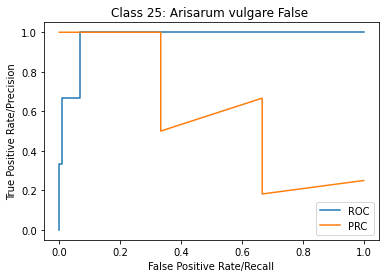

PRC AUC:0.5997474747474747
ROC AUC:0.9749373433583959


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr25, tpr25, thresholds25 = roc_curve(DataActions_test[:,18], probs_1[:,18])
prec25, recall25, thresholds25 = precision_recall_curve(DataActions_test[:,18], probs_1[:,18])

plt.plot(fpr25,tpr25,label="ROC")
plt.plot(recall25,prec25,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 25: Arisarum vulgare False ')
plt.show()
plt.savefig("Class 25 Arisarum vulgare Neural Network false.png")

print("PRC AUC:" + str(auc(recall25, prec25)))
print("ROC AUC:" + str(auc(fpr25, tpr25)))

In [ ]:
score_false_25=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][18]>=0.5:
    score_false_25.append(1)
  else:
    score_false_25.append(0)

score_false_25

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_25=[]

In [ ]:
for x in range(0,136):
  if score_false_25[x]!=DataActions_true[x,18]:
    score_false_index_25.append(x+1)

In [ ]:
score_false_index_25

[27, 35, 53]

### Class 26: Enonymus japonicus

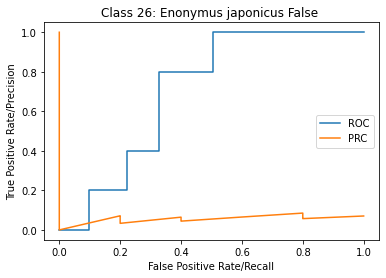

PRC AUC:0.0556829036180151
ROC AUC:0.7038167938931298


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr26, tpr26, thresholds26 = roc_curve(DataActions_test[:,19], probs_1[:,19])
prec26, recall26, thresholds26 = precision_recall_curve(DataActions_test[:,19], probs_1[:,19])

plt.plot(fpr26,tpr26,label="ROC")
plt.plot(recall26,prec26,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 26: Enonymus japonicus False ')
plt.show()
plt.savefig("Class 26 Enonymus japonicus Neural Network false.png")

print("PRC AUC:" + str(auc(recall26, prec26)))
print("ROC AUC:" + str(auc(fpr26, tpr26)))

In [ ]:
score_false_26=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][19]>=0.5:
    score_false_26.append(1)
  else:
    score_false_26.append(0)

score_false_26

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_26=[]

In [ ]:
for x in range(0,136):
  if score_false_26[x]!=DataActions_true[x,19]:
    score_false_index_26.append(x+1)

In [ ]:
score_false_index_26

[28, 37, 62, 83, 135]

### Class 27: Ilex perado ssp. azorica

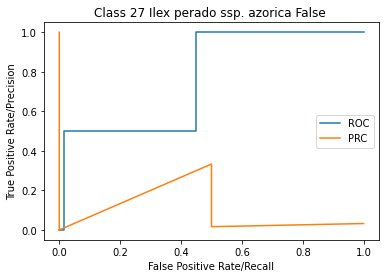

PRC AUC:0.09549621011810329
ROC AUC:0.7686567164179106


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr27, tpr27, thresholds27 = roc_curve(DataActions_test[:,20], probs_1[:,20])
prec27, recall27, thresholds27 = precision_recall_curve(DataActions_test[:,20], probs_1[:,20])

plt.plot(fpr27,tpr27,label="ROC")
plt.plot(recall27,prec27,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 27 Ilex perado ssp. azorica False ')
plt.show()
plt.savefig("Class 27 Ilex perado ssp azorica Neural Network false.png")

print("PRC AUC:" + str(auc(recall27, prec27)))
print("ROC AUC:" + str(auc(fpr27, tpr27)))

In [ ]:
score_false_27=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][20]>=0.5:
    score_false_27.append(1)
  else:
    score_false_27.append(0)

score_false_27

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_27=[]

In [ ]:
for x in range(0,136):
  if score_false_27[x]!=DataActions_true[x,20]:
    score_false_index_27.append(x+1)

In [ ]:
score_false_index_27

[20, 78]

### Class 28: Magnolia soulangeana

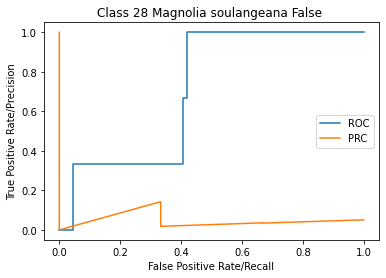

PRC AUC:0.04701391050017584
ROC AUC:0.7092731829573935


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr28, tpr28, thresholds28 = roc_curve(DataActions_test[:,21], probs_1[:,21])
prec28, recall28, thresholds28 = precision_recall_curve(DataActions_test[:,21], probs_1[:,21])

plt.plot(fpr28,tpr28,label="ROC")
plt.plot(recall28,prec28,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 28 Magnolia soulangeana False ')
plt.show()
plt.savefig("Class 28 Magnolia soulangeana Neural Network false.png")

print("PRC AUC:" + str(auc(recall28, prec28)))
print("ROC AUC:" + str(auc(fpr28, tpr28)))

In [ ]:
score_false_28=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][21]>=0.5:
    score_false_28.append(1)
  else:
    score_false_28.append(0)

score_false_28

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_28=[]

In [ ]:
for x in range(0,136):
  if score_false_28[x]!=DataActions_true[x,21]:
    score_false_index_28.append(x+1)

In [ ]:
score_false_index_28

[7, 48, 59]

### Class 29: Buxus sempervirens

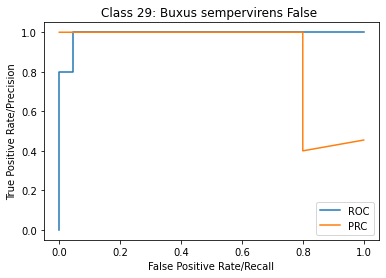

PRC AUC:0.8854545454545455
ROC AUC:0.9908396946564886


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr29, tpr29, thresholds29 = roc_curve(DataActions_test[:,22], probs_1[:,22])
prec29, recall29, thresholds29 = precision_recall_curve(DataActions_test[:,22], probs_1[:,22])

plt.plot(fpr29,tpr29,label="ROC")
plt.plot(recall29,prec29,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 29: Buxus sempervirens False ')
plt.show()
plt.savefig("Class 29: Buxus sempervirens Neural Network false.png")

print("PRC AUC:" + str(auc(recall29, prec29)))
print("ROC AUC:" + str(auc(fpr29, tpr29)))

In [ ]:
score_false_29=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][22]>=0.5:
    score_false_29.append(1)
  else:
    score_false_29.append(0)

score_false_29

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_29=[]

In [ ]:
for x in range(0,136):
  if score_false_29[x]!=DataActions_true[x,22]:
    score_false_index_29.append(x+1)

In [ ]:
score_false_index_29

[11, 41, 57, 73, 99]

### Class 30: Urtica dioca

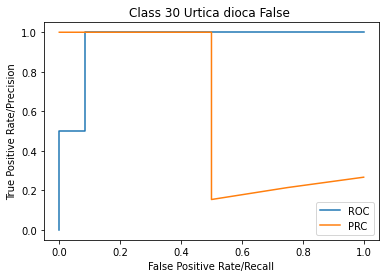

PRC AUC:0.6061355311355312
ROC AUC:0.9583333333333333


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr30, tpr30, thresholds30 = roc_curve(DataActions_test[:,23], probs_1[:,23])
prec30, recall30, thresholds30 = precision_recall_curve(DataActions_test[:,23], probs_1[:,23])

plt.plot(fpr30,tpr30,label="ROC")
plt.plot(recall30,prec30,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 30 Urtica dioca False ')
plt.show()
plt.savefig("Class 30 Urtica dioca Neural Network false.png")

print("PRC AUC:" + str(auc(recall30, prec30)))
print("ROC AUC:" + str(auc(fpr30, tpr30)))

In [ ]:
score_false_30=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][23]>=0.5:
    score_false_30.append(1)
  else:
    score_false_30.append(0)

score_false_30

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_30=[]

In [ ]:
for x in range(0,136):
  if score_false_30[x]!=DataActions_true[x,23]:
    score_false_index_30.append(x+1)

In [ ]:
score_false_index_30

[26, 84, 96, 119]

### Class 31: Podocarpus sp.

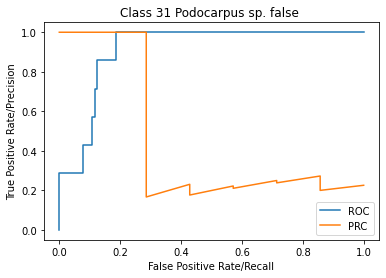

PRC AUC:0.4423774275798787
ROC AUC:0.9125138427464009


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr31, tpr31, thresholds31 = roc_curve(DataActions_test[:,24], probs_1[:,24])
prec31, recall31, thresholds31 = precision_recall_curve(DataActions_test[:,24], probs_1[:,24])

plt.plot(fpr31,tpr31,label="ROC")
plt.plot(recall31,prec31,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 31 Podocarpus sp. false ')
plt.show()
plt.savefig("Class 31 Podocarpus sp. Neural Network False.png")

print("PRC AUC:" + str(auc(recall31, prec31)))
print("ROC AUC:" + str(auc(fpr31, tpr31)))

In [ ]:
score_false_31=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][24]>=0.5:
    score_false_31.append(1)
  else:
    score_false_31.append(0)

score_false_31

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_31=[]

In [ ]:
for x in range(0,136):
  if score_false_31[x]!=DataActions_true[x,24]:
    score_false_index_31.append(x+1)

In [ ]:
score_false_index_31

[13, 23, 47, 49, 63, 69, 122]

### Class 32: Acca sellowiana

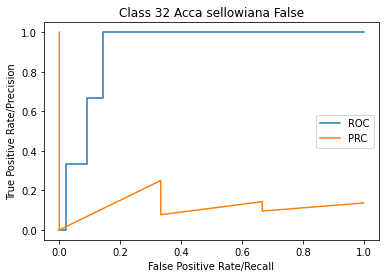

PRC AUC:0.11689699189699188
ROC AUC:0.9147869674185465


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr32, tpr32, thresholds32 = roc_curve(DataActions_test[:,25], probs_1[:,25])
prec32, recall32, thresholds32 = precision_recall_curve(DataActions_test[:,25], probs_1[:,25])

plt.plot(fpr32,tpr32,label="ROC")
plt.plot(recall32,prec32,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 32 Acca sellowiana False')
plt.show()
plt.savefig("Class 32 Acca sellowiana Neural Network false.png")

print("PRC AUC:" + str(auc(recall32, prec32)))
print("ROC AUC:" + str(auc(fpr32, tpr32)))

In [ ]:
score_false_32=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][24]>=0.5:
    score_false_32.append(1)
  else:
    score_false_32.append(0)

score_false_32

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_32=[]

In [ ]:
for x in range(0,136):
  if score_false_32[x]!=DataActions_true[x,25]:
    score_false_index_32.append(x+1)

In [ ]:
score_false_index_32

[54, 107, 121]

### Class 33: Hydrangea sp.

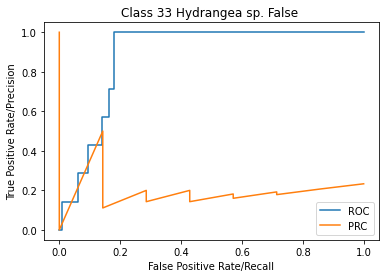

PRC AUC:0.18976065259316488
ROC AUC:0.8826135105204873


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr33, tpr33, thresholds33 = roc_curve(DataActions_test[:,26], probs_1[:,26])
prec33, recall33, thresholds33 = precision_recall_curve(DataActions_test[:,26], probs_1[:,26])

plt.plot(fpr33,tpr33,label="ROC")
plt.plot(recall33,prec33,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 33 Hydrangea sp. False ')
plt.show()
plt.savefig("Class 33 Hydrangea sp Neural Network false.png")

print("PRC AUC:" + str(auc(recall33, prec33)))
print("ROC AUC:" + str(auc(fpr33, tpr33)))

In [ ]:
score_false_33=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][26]>=0.5:
    score_false_33.append(1)
  else:
    score_false_33.append(0)

score_false_33

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_33=[]

In [ ]:
for x in range(0,136):
  if score_false_33[x]!=DataActions_true[x,26]:
    score_false_index_33.append(x+1)

In [ ]:
score_false_index_33

[19, 24, 52, 55, 72, 114, 130]

### Class 34: Pseudosasa japonica

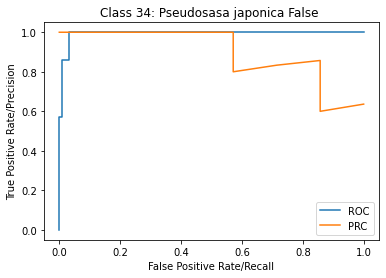

PRC AUC:0.8971552257266542
ROC AUC:0.9933554817275747


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr34, tpr34, thresholds34 = roc_curve(DataActions_test[:,27], probs_1[:,27])
prec34, recall34, thresholds34 = precision_recall_curve(DataActions_test[:,27], probs_1[:,27])

plt.plot(fpr34,tpr34,label="ROC")
plt.plot(recall34,prec34,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 34: Pseudosasa japonica False ')
plt.show()
plt.savefig("Class 34 Pseudosasa japonica Neural Network false.png")

print("PRC AUC:" + str(auc(recall34, prec34)))
print("ROC AUC:" + str(auc(fpr34, tpr34)))

In [ ]:
score_false_34=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][27]>=0.5:
    score_false_34.append(1)
  else:
    score_false_34.append(0)

score_false_34

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_34=[]

In [ ]:
for x in range(0,136):
  if score_false_34[x]!=DataActions_true[x,27]:
    score_false_index_34.append(x+1)

In [ ]:
score_false_index_34

[4, 8, 15, 25, 30, 61, 82]

### Class 35: Magnolia grandiflora

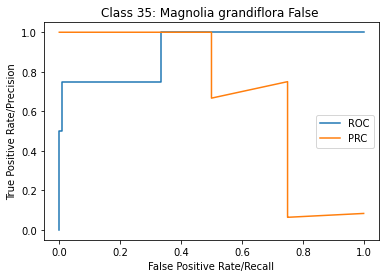

PRC AUC:0.6954787234042552
ROC AUC:0.9147727272727273


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr35, tpr35, thresholds35 = roc_curve(DataActions_test[:,28], probs_1[:,28])
prec35, recall35, thresholds35 = precision_recall_curve(DataActions_test[:,28], probs_1[:,28])

plt.plot(fpr35,tpr35,label="ROC")
plt.plot(recall35,prec35,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 35: Magnolia grandiflora False ')
plt.show()
plt.savefig("Class 35 Magnolia grandiflora Neural Network false.png")

print("PRC AUC:" + str(auc(recall35, prec35)))
print("ROC AUC:" + str(auc(fpr35, tpr35)))

In [ ]:
score_false_35=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][28]>=0.5:
    score_false_35.append(1)
  else:
    score_false_35.append(0)

score_false_35

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_35=[]

In [ ]:
for x in range(0,136):
  if score_false_35[x]!=DataActions_true[x,28]:
    score_false_index_35.append(x+1)

In [ ]:
score_false_index_35

[56, 64, 90, 106]

### Class 36: Geranium sp.

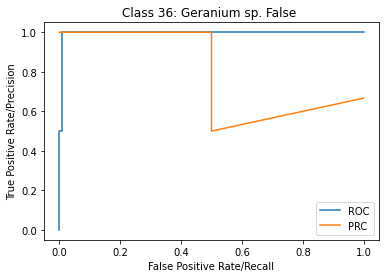

PRC AUC:0.7916666666666666
ROC AUC:0.9962686567164178


<Figure size 432x288 with 0 Axes>

In [ ]:
fpr36, tpr36, thresholds36 = roc_curve(DataActions_test[:,29], probs_1[:,29])
prec36, recall36, thresholds36 = precision_recall_curve(DataActions_test[:,29], probs_1[:,29])

plt.plot(fpr36,tpr36,label="ROC")
plt.plot(recall36,prec36,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Class 36: Geranium sp. False ')
plt.show()
plt.savefig("Class 36 Geranium sp Neural Network false.png")

print("PRC AUC:" + str(auc(recall36, prec36)))
print("ROC AUC:" + str(auc(fpr36, tpr36)))

In [ ]:
score_false_36=[]

In [ ]:
for x in range(0,136):
  if probs_1[x][29]>=0.5:
    score_false_36.append(1)
  else:
    score_false_36.append(0)

score_false_36

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
score_false_index_36=[]

In [ ]:
for x in range(0,136):
  if score_false_36[x]!=DataActions_true[x,29]:
    score_false_index_36.append(x+1)

In [ ]:
score_false_index_36

[81]

#Rule Evaluation

##True

###1-15

####Class 1: Quercus suber

In [28]:
score_true_index_1=[1, 36, 98, 100]

In [29]:
dataframe=[]

In [30]:
for x in score_true_index_1:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe.append(ruleset_filter_test3)

In [31]:
dataframe[0].to_csv('class_1_iteration_1_XCS.csv', index=False) 
files.download('class_1_iteration_1_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
dataframe[1].to_csv('class_1_iteration_36_XCS.csv', index=False) 
files.download('class_1_iteration_36_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
dataframe[2].to_csv('class_1_iteration_98_XCS.csv', index=False) 
files.download('class_1_iteration_98_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
dataframe[3].to_csv('class_1_iteration_100_XCS.csv', index=False) 
files.download('class_1_iteration_100_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Class 2: Salix atrocinera

In [36]:
score_true_index_2=[108, 116]

In [37]:
dataframe2=[]

In [38]:
for x in score_true_index_2:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe2.append(ruleset_filter_test3)

In [78]:
dataframe2[0].to_csv('class_2_iteration_1_XCS.csv', index=False) 
files.download('class_2_iteration_1_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
dataframe2[1].to_csv('class_2_iteration_116_XCS.csv', index=False) 
files.download('class_2_iteration_116_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Class 3: Populus nigra

In [41]:
#none

####Class 4: Alnus sp.

In [42]:
score_true_index_4=[67, 70, 120]

In [43]:
dataframe4=[]

In [44]:
for x in score_true_index_4:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe4.append(ruleset_filter_test3)

In [45]:
dataframe4[0].to_csv('class_4_iteration_67_XCS.csv', index=False) 
files.download('class_4_iteration_67_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
dataframe4[1].to_csv('class_4_iteration_70_XCS.csv', index=False) 
files.download('class_4_iteration_70_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
dataframe4[2].to_csv('class_4_iteration_120_XCS.csv', index=False) 
files.download('class_4_iteration_120_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Class 5: Quercus robur

In [79]:
score_true_index_5=[40]

In [80]:
dataframe5=[]

In [81]:
for x in score_true_index_5:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe5.append(ruleset_filter_test3)

In [82]:
dataframe5[0].to_csv('class_5_iteration_40_XCS.csv', index=False) 
files.download('class_5_iteration_40_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Class 6: Crataegus monogyna

In [52]:
#none

####Class 7: Hex aquifolium

In [53]:
#none

####Class 8: Nerium oleander

In [54]:
#none

####Class 9: Betula pubescens

In [55]:
#none

####Class 10: Tilia tomentosa

In [56]:
score_true_index_10=[3]

In [57]:
dataframe10=[]

In [58]:
for x in score_true_index_10:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe10.append(ruleset_filter_test3)

In [59]:
dataframe10[0].to_csv('class_10_iteration_3_XCS.csv', index=False) 
files.download('class_10_iteration_3_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Class 11: Acer palmatum

In [60]:
#none

####Class 12: Celtis sp.

In [61]:
#none

####Class 13: Corylus avellana

In [62]:
score_true_index_13=[117]

In [63]:
dataframe13=[]

In [64]:
for x in score_true_index_13:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe13.append(ruleset_filter_test3)

In [65]:
dataframe13[0].to_csv('class_13_iteration_117_XCS.csv', index=False) 
files.download('class_13_iteration_117_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Class 14: Castanea sativa

In [66]:
score_true_index_14=[50, 71, 94, 102, 111]

In [67]:
dataframe14=[]

In [68]:
for x in score_true_index_14:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe14.append(ruleset_filter_test3)

In [69]:
dataframe14[0].to_csv('class_14_iteration_50_XCS.csv', index=False) 
files.download('class_14_iteration_50_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
dataframe14[1].to_csv('class_14_iteration_71_XCS.csv', index=False) 
files.download('class_14_iteration_71_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
dataframe14[2].to_csv('class_14_iteration_94_XCS.csv', index=False) 
files.download('class_14_iteration_94_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
dataframe14[3].to_csv('class_14_iteration_102_XCS.csv', index=False) 
files.download('class_14_iteration_102_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
dataframe14[4].to_csv('class_14_iteration_111_XCS.csv', index=False) 
files.download('class_14_iteration_111_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Class 15: Populus alba

In [74]:
score_true_index_15=[33]

In [75]:
dataframe15=[]

In [76]:
for x in score_true_index_15:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe15.append(ruleset_filter_test3)

In [77]:
dataframe15[0].to_csv('class_15_iteration_33_XCS.csv', index=False) 
files.download('class_15_iteration_33_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###22-36

####Class 22: Primula vulgaris

In [83]:
#none

####Class 23: Erodium sp.

In [84]:
score_true_index_23=[42, 86, 91, 115, 124]

In [85]:
dataframe23=[]

In [86]:
for x in score_true_index_23:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe23.append(ruleset_filter_test3)

In [87]:
dataframe23[0].to_csv('class_23_iteration_42_XCS.csv', index=False) 
files.download('class_23_iteration_42_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:
dataframe23[1].to_csv('class_23_iteration_86_XCS.csv', index=False) 
files.download('class_23_iteration_86_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [89]:
dataframe23[2].to_csv('class_23_iteration_91_XCS.csv', index=False) 
files.download('class_23_iteration_91_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [90]:
dataframe23[3].to_csv('class_23_iteration_115_XCS.csv', index=False) 
files.download('class_23_iteration_115_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:
dataframe23[4].to_csv('class_23_iteration_124_XCS.csv', index=False) 
files.download('class_23_iteration_124_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Class 24: Bougainvillea sp. 

In [92]:
#none

####Class 25: Arisarum vulgare

In [93]:
#none

####Class 26: Enonymus japonicus

In [94]:
score_true_index_26=[62, 83, 135]

In [95]:
dataframe26=[]

In [96]:
for x in score_true_index_26:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe26.append(ruleset_filter_test3)

In [97]:
dataframe26[0].to_csv('class_26_iteration_62_XCS.csv', index=False) 
files.download('class_26_iteration_62_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
dataframe26[1].to_csv('class_26_iteration_83_XCS.csv', index=False) 
files.download('class_26_iteration_83_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
dataframe26[2].to_csv('class_26_iteration_135_XCS.csv', index=False) 
files.download('class_26_iteration_135_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Class 27: Ilex perado ssp. azorica

In [100]:
#none

####Class 28: Magnolia soulangeana

In [101]:
score_true_index_28=[7, 48, 59]

In [102]:
dataframe28=[]

In [103]:
for x in score_true_index_28:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe28.append(ruleset_filter_test3)

In [104]:
dataframe28[0].to_csv('class_28_iteration_7_XCS.csv', index=False) 
files.download('class_28_iteration_7_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [105]:
dataframe28[1].to_csv('class_28_iteration_48_XCS.csv', index=False) 
files.download('class_28_iteration_48_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
dataframe28[2].to_csv('class_28_iteration_59_XCS.csv', index=False) 
files.download('class_28_iteration_59_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Class 29: Buxus sempervirens

In [107]:
#none

####Class 30: Urtica dioca

In [108]:
score_true_index_30=[84]

In [109]:
dataframe30=[]

In [110]:
for x in score_true_index_30:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe30.append(ruleset_filter_test3)

In [111]:
dataframe30[0].to_csv('class_30_iteration_84_XCS.csv', index=False) 
files.download('class_30_iteration_84_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Class 31: Podocarpus sp.

In [112]:
score_true_index_31=[49]

In [113]:
dataframe31=[]

In [114]:
for x in score_true_index_31:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe31.append(ruleset_filter_test3)

In [115]:
dataframe31[0].to_csv('class_31_iteration_49_XCS.csv', index=False) 
files.download('class_31_iteration_49_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Class 32: Acca sellowiana

In [120]:
score_true_index_32=[54, 107, 121]

In [121]:
dataframe32=[]

In [122]:
for x in score_true_index_32:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe32.append(ruleset_filter_test3)

In [123]:
dataframe32[0].to_csv('class_32_iteration_54_XCS.csv', index=False) 
files.download('class_32_iteration_54_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [124]:
dataframe32[1].to_csv('class_32_iteration_107_XCS.csv', index=False) 
files.download('class_32_iteration_107_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [125]:
dataframe32[2].to_csv('class_32_iteration_121_XCS.csv', index=False) 
files.download('class_32_iteration_121_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Class 33: Hydrangea sp.

In [126]:
score_true_index_33=[19, 24, 52, 55, 114, 130]

In [127]:
dataframe33=[]

In [128]:
for x in score_true_index_33:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe33.append(ruleset_filter_test3)

In [129]:
dataframe33[0].to_csv('class_33_iteration_19_XCS.csv', index=False) 
files.download('class_33_iteration_19_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
dataframe33[1].to_csv('class_33_iteration_24_XCS.csv', index=False) 
files.download('class_33_iteration_24_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [131]:
dataframe33[2].to_csv('class_33_iteration_52_XCS.csv', index=False) 
files.download('class_33_iteration_52_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [132]:
dataframe33[3].to_csv('class_33_iteration_55_XCS.csv', index=False) 
files.download('class_33_iteration_55_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [133]:
dataframe33[4].to_csv('class_33_iteration_114_XCS.csv', index=False) 
files.download('class_33_iteration_114_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
dataframe33[5].to_csv('class_33_iteration_130_XCS.csv', index=False) 
files.download('class_33_iteration_130_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Class 34: Pseudosasa japonica

In [135]:
score_true_index_34=[15,61, 82]

In [136]:
dataframe34=[]

In [137]:
for x in score_true_index_34:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe34.append(ruleset_filter_test3)

In [138]:
dataframe34[0].to_csv('class_34_iteration_15_XCS.csv', index=False) 
files.download('class_34_iteration_15_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [139]:
dataframe34[1].to_csv('class_34_iteration_61_XCS.csv', index=False) 
files.download('class_34_iteration_61_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [140]:
dataframe34[2].to_csv('class_34_iteration_82_XCS.csv', index=False) 
files.download('class_34_iteration_82_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Class 35: Magnolia grandiflora

In [141]:
score_true_index_35=[56, 64, 90, 106]

In [142]:
dataframe35=[]

In [143]:
for x in score_true_index_35:

  class_check=dataActions_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe35.append(ruleset_filter_test3)

In [144]:
dataframe35[0].to_csv('class_35_iteration_56_XCS.csv', index=False) 
files.download('class_35_iteration_56_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [145]:
dataframe35[1].to_csv('class_35_iteration_64_XCS.csv', index=False) 
files.download('class_35_iteration_64_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [146]:
dataframe35[2].to_csv('class_35_iteration_90_XCS.csv', index=False) 
files.download('class_35_iteration_90_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [147]:
dataframe35[3].to_csv('class_35_iteration_106_XCS.csv', index=False) 
files.download('class_35_iteration_106_XCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Class 36: Geranium sp.





In [ ]:
#none

##False

###1-15

####Class 1: Quercus suber

In [ ]:
score_true_index_1=[1, 36, 98, 100]

In [ ]:
dataframe=[]

In [ ]:
for x in score_true_index_1:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe.append(ruleset_filter_test3)

In [ ]:
dataframe[0].to_csv('class_1_iteration_1_XCS.csv', index=False) 
files.download('class_1_iteration_1.csv')

In [ ]:
dataframe[1].to_csv('class_1_iteration_36_XCS.csv', index=False) 
files.download('class_1_iteration_36.csv')

In [ ]:
dataframe[2].to_csv('class_1_iteration_98_XCS.csv', index=False) 
files.download('class_1_iteration_98_XCS.csv')

In [ ]:
dataframe[3].to_csv('class_1_iteration_100_XCS.csv', index=False) 
files.download('class_1_iteration_100_XCS.csv')

####Class 2: Salix atrocinera

In [ ]:
score_true_index_2=[108, 116]

In [ ]:
dataframe2=[]

In [ ]:
for x in score_true_index_2:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe2.append(ruleset_filter_test3)

In [ ]:
dataframe2[0].to_csv('class_2_iteration_1_XCS.csv', index=False) 
files.download('class_1_iteration_1_XCS.csv')

In [ ]:
dataframe2[1].to_csv('class_2_iteration_116_XCS.csv', index=False) 
files.download('class_2_iteration_116_XCS.csv')

####Class 3: Populus nigra

In [ ]:
#none

####Class 4: Alnus sp.

In [ ]:
score_true_index_4=[67, 70, 120]

In [ ]:
dataframe4=[]

In [ ]:
for x in score_true_index_4:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe4.append(ruleset_filter_test3)

In [ ]:
dataframe4[0].to_csv('class_4_iteration_67_XCS.csv', index=False) 
files.download('class_4_iteration_67_XCS.csv')

In [ ]:
dataframe4[1].to_csv('class_4_iteration_70_XCS.csv', index=False) 
files.download('class_4_iteration_70_XCS.csv')

In [ ]:
dataframe4[2].to_csv('class_4_iteration_120_XCS.csv', index=False) 
files.download('class_4_iteration_120_XCS.csv')

####Class 5: Quercus robur

In [ ]:
score_true_index_5=[40]

In [ ]:
dataframe5=[]

In [ ]:
for x in score_true_index_5:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe5.append(ruleset_filter_test3)

In [ ]:
dataframe5[0].to_csv('class_4_iteration_40.csv', index=False) 
files.download('class_4_iteration_40.csv')

####Class 6: Crataegus monogyna

In [ ]:
#none

####Class 7: Hex aquifolium

In [ ]:
#none

####Class 8: Nerium oleander

In [ ]:
#none

####Class 9: Betula pubescens

In [ ]:
#none

####Class 10: Tilia tomentosa

In [ ]:
score_true_index_10=[3]

In [ ]:
dataframe10=[]

In [ ]:
for x in score_true_index_10:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe10.append(ruleset_filter_test3)

In [ ]:
dataframe10[0].to_csv('class_10_iteration_3_XCS.csv', index=False) 
files.download('class_10_iteration_3_XCS.csv')

####Class 11: Acer palmatum

In [ ]:
#none

####Class 12: Celtis sp.

In [ ]:
#none

####Class 13: Corylus avellana

In [ ]:
score_true_index_7=[117]

In [ ]:
dataframe13=[]

In [ ]:
for x in score_true_index_13:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe13.append(ruleset_filter_test3)

In [ ]:
dataframe13[0].to_csv('class_13_iteration_117_XCS.csv', index=False) 
files.download('class_13_iteration_117_XCS.csv')

####Class 14: Castanea sativa

In [ ]:
score_true_index_14=[50, 71, 94, 102, 111]

In [ ]:
dataframe14=[]

In [ ]:
for x in score_true_index_14:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe14.append(ruleset_filter_test3)

NameError: ignored

In [ ]:
dataframe14[0].to_csv('class_14_iteration_50_XCS.csv', index=False) 
files.download('class_14_iteration_50_XCS.csv')

In [ ]:
dataframe14[1].to_csv('class_14_iteration_71_XCS.csv', index=False) 
files.download('class_14_iteration_71_XCS.csv')

In [ ]:
dataframe14[2].to_csv('class_14_iteration_94_XCS.csv', index=False) 
files.download('class_14_iteration_94_XCS.csv')

In [ ]:
dataframe14[3].to_csv('class_14_iteration_102_XCS.csv', index=False) 
files.download('class_14_iteration_102_XCS.csv')

In [ ]:
dataframe14[4].to_csv('class_14_iteration_111_XCS.csv', index=False) 
files.download('class_14_iteration_111_XCS.csv')

####Class 15: Populus alba

In [ ]:
score_true_index_15=[33]

In [ ]:
dataframe15=[]

In [ ]:
for x in score_true_index_15:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe15.append(ruleset_filter_test3)

In [ ]:
dataframe15[0].to_csv('class_15_iteration_33_XCS.csv', index=False) 
files.download('class_15_iteration_33_XCS.csv')

###22-36

####Class 22: Primula vulgaris

In [ ]:
#none

####Class 23: Erodium sp.

In [ ]:
score_true_index_23=[42, 86, 91, 115, 124]

In [ ]:
dataframe23=[]

In [ ]:
for x in score_true_index_23:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe23.append(ruleset_filter_test3)

In [ ]:
dataframe23[0].to_csv('class_23_iteration_42_XCS.csv', index=False) 
files.download('class_23_iteration_42_XCS.csv')

In [ ]:
dataframe23[1].to_csv('class_23_iteration_86_XCS.csv', index=False) 
files.download('class_23_iteration_86_XCS.csv')

In [ ]:
dataframe23[2].to_csv('class_23_iteration_91_XCS.csv', index=False) 
files.download('class_23_iteration_91_XCS.csv')

In [ ]:
dataframe23[3].to_csv('class_23_iteration_115_XCS.csv', index=False) 
files.download('class_23_iteration_115_XCS.csv')

In [ ]:
dataframe23[4].to_csv('class_23_iteration_124_XCS.csv', index=False) 
files.download('class_23_iteration_124_XCS.csv')

####Class 24: Bougainvillea sp. 

In [ ]:
#none

####Class 25: Arisarum vulgare

In [ ]:
#none

####Class 26: Enonymus japonicus

In [ ]:
score_true_index_26=[62, 83, 135]

In [ ]:
dataframe26=[]

In [ ]:
for x in score_true_index_26:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe26.append(ruleset_filter_test3)

In [ ]:
dataframe26[0].to_csv('class_26_iteration_62_XCS.csv', index=False) 
files.download('class_26_iteration_62_XCS.csv')

In [ ]:
dataframe26[1].to_csv('class_26_iteration_83_XCS.csv', index=False) 
files.download('class_26_iteration_83_XCS.csv')

In [ ]:
dataframe26[2].to_csv('class_26_iteration_135_XCS.csv', index=False) 
files.download('class_26_iteration_135_XCS.csv')

####Class 27: Ilex perado ssp. azorica

In [ ]:
#none

####Class 28: Magnolia soulangeana

In [ ]:
score_true_index_28=[7, 48, 59]

In [ ]:
dataframe28=[]

In [ ]:
for x in score_true_index_28:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe28.append(ruleset_filter_test3)

In [ ]:
dataframe28[0].to_csv('class_28_iteration_7_XCS.csv', index=False) 
files.download('class_28_iteration_7_XCS.csv')

In [ ]:
dataframe28[1].to_csv('class_28_iteration_48_XCS.csv', index=False) 
files.download('class_28_iteration_48_XCS.csv')

In [ ]:
dataframe28[2].to_csv('class_28_iteration_59_XCS.csv', index=False) 
files.download('class_28_iteration_59_XCS.csv')

####Class 29: Buxus sempervirens

In [ ]:
#none

####Class 30: Urtica dioca

In [ ]:
score_true_index_30=[84]

In [ ]:
dataframe30=[]

In [ ]:
for x in score_true_index_30:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe30.append(ruleset_filter_test3)

In [ ]:
dataframe30[0].to_csv('class_30_iteration_84_XCS.csv', index=False) 
files.download('class_30_iteration_84_XCS.csv')

####Class 31: Podocarpus sp.

In [ ]:
score_true_index_31=[49]

In [ ]:
dataframe31=[]

In [ ]:
for x in score_true_index_31:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe31.append(ruleset_filter_test3)

In [ ]:
dataframe31[0].to_csv('class_31_iteration_49_XCS.csv', index=False) 
files.download('class_31_iteration_49_XCS.csv')

####Class 32: Acca sellowiana

In [ ]:
score_true_index_32=[54, 107, 121]

In [ ]:
dataframe32=[]

In [ ]:
for x in score_true_index_32:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe32.append(ruleset_filter_test3)

In [ ]:
dataframe32[0].to_csv('class_32_iteration_54_XCS.csv', index=False) 
files.download('class_28_iteration_54_XCS.csv')

In [ ]:
dataframe32[1].to_csv('class_32_iteration_107_XCS.csv', index=False) 
files.download('class_32_iteration_107_XCS.csv')

In [ ]:
dataframe32[2].to_csv('class_32_iteration_121_XCS.csv', index=False) 
files.download('class_32_iteration_121_XCS.csv')

#### Class 33: Hydrangea sp.

In [ ]:
score_true_index_33=[19, 24, 52, 55, 114, 130]

In [ ]:
dataframe33=[]

In [ ]:
for x in score_true_index_33:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe33.append(ruleset_filter_test3)

In [ ]:
dataframe33[0].to_csv('class_33_iteration_19_XCS.csv', index=False) 
files.download('class_33_iteration_19_XCS.csv')

In [ ]:
dataframe33[1].to_csv('class_33_iteration_24_XCS.csv', index=False) 
files.download('class_33_iteration_24_XCS.csv')

In [ ]:
dataframe33[2].to_csv('class_33_iteration_52_XCS.csv', index=False) 
files.download('class_33_iteration_52_XCS.csv')

In [ ]:
dataframe33[3].to_csv('class_33_iteration_55_XCS.csv', index=False) 
files.download('class_33_iteration_55_XCS.csv')

In [ ]:
dataframe33[4].to_csv('class_33_iteration_114_XCS.csv', index=False) 
files.download('class_33_iteration_114_XCS.csv')

In [ ]:
dataframe33[5].to_csv('class_33_iteration_130_XCS.csv', index=False) 
files.download('class_33_iteration_130_XCS.csv')

#### Class 34: Pseudosasa japonica

In [ ]:
score_true_index_34=[15,61, 82]

In [ ]:
dataframe34=[]

In [ ]:
for x in score_true_index_34:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe34.append(ruleset_filter_test3)

In [ ]:
dataframe34[0].to_csv('class_34_iteration_15_XCS.csv', index=False) 
files.download('class_34_iteration_15_XCS.csv')

In [ ]:
dataframe34[1].to_csv('class_34_iteration_61_XCS.csv', index=False) 
files.download('class_34_iteration_61_XCS.csv')

In [ ]:
dataframe34[2].to_csv('class_34_iteration_82_XCS.csv', index=False) 
files.download('class_34_iteration_82_XCS.csv')

#### Class 35: Magnolia grandiflora

In [ ]:
score_true_index_35=[56, 64, 90, 106]

In [ ]:
dataframe35=[]

In [ ]:
for x in score_true_index_35:

  class_check=dataPhenotypes_true[x-1]
  ruleset_filter= ruleset3[ruleset3['Class'] == class_check]

  ruleset_filter2=ruleset_filter.astype(float)


  for y in range(iteration):

    c=dataFeatures_true[x-1][y]

    l=2*y
    h=l+1

    low=Features[l]
    high=Features[h]

    if y==0:
      ruleset_filter_test= ruleset_filter2[(ruleset_filter2[low] < c)&((ruleset_filter2[high] >= c) | (ruleset_filter2[high] == 0)) ]
    else:
      ruleset_filter_test= ruleset_filter_test[(ruleset_filter_test[low] < c)&((ruleset_filter_test[high] >= c) | (ruleset_filter_test[high] == 0)) ]
  
  ruleset_filter_test2= ruleset_filter_test[ruleset_filter_test[correct] != 0 ]
  ruleset_filter_test3=ruleset_filter_test2.replace(0,'#')
  dataframe35.append(ruleset_filter_test3)

In [ ]:
dataframe35[0].to_csv('class_35_iteration_56_XCS.csv', index=False) 
files.download('class_35_iteration_56_XCS.csv')

In [ ]:
dataframe35[1].to_csv('class_35_iteration_64_XCS.csv', index=False) 
files.download('class_35_iteration_64_XCS.csv')

In [ ]:
dataframe35[2].to_csv('class_35_iteration_90_XCS.csv', index=False) 
files.download('class_35_iteration_90_XCS.csv')

In [ ]:
dataframe35[3].to_csv('class_35_iteration_106_XCS.csv', index=False) 
files.download('class_35_iteration_106_XCS.csv')

#### Class 36: Geranium sp.





In [ ]:
#none